In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

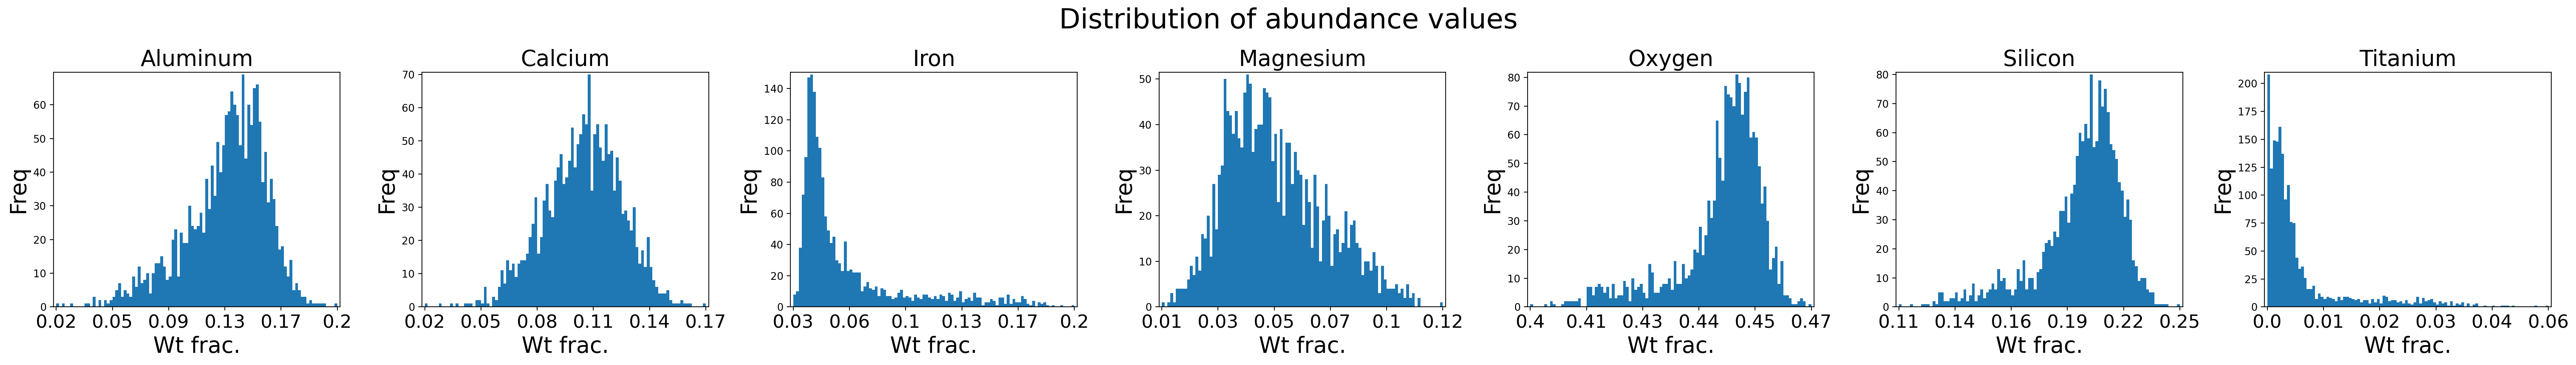

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

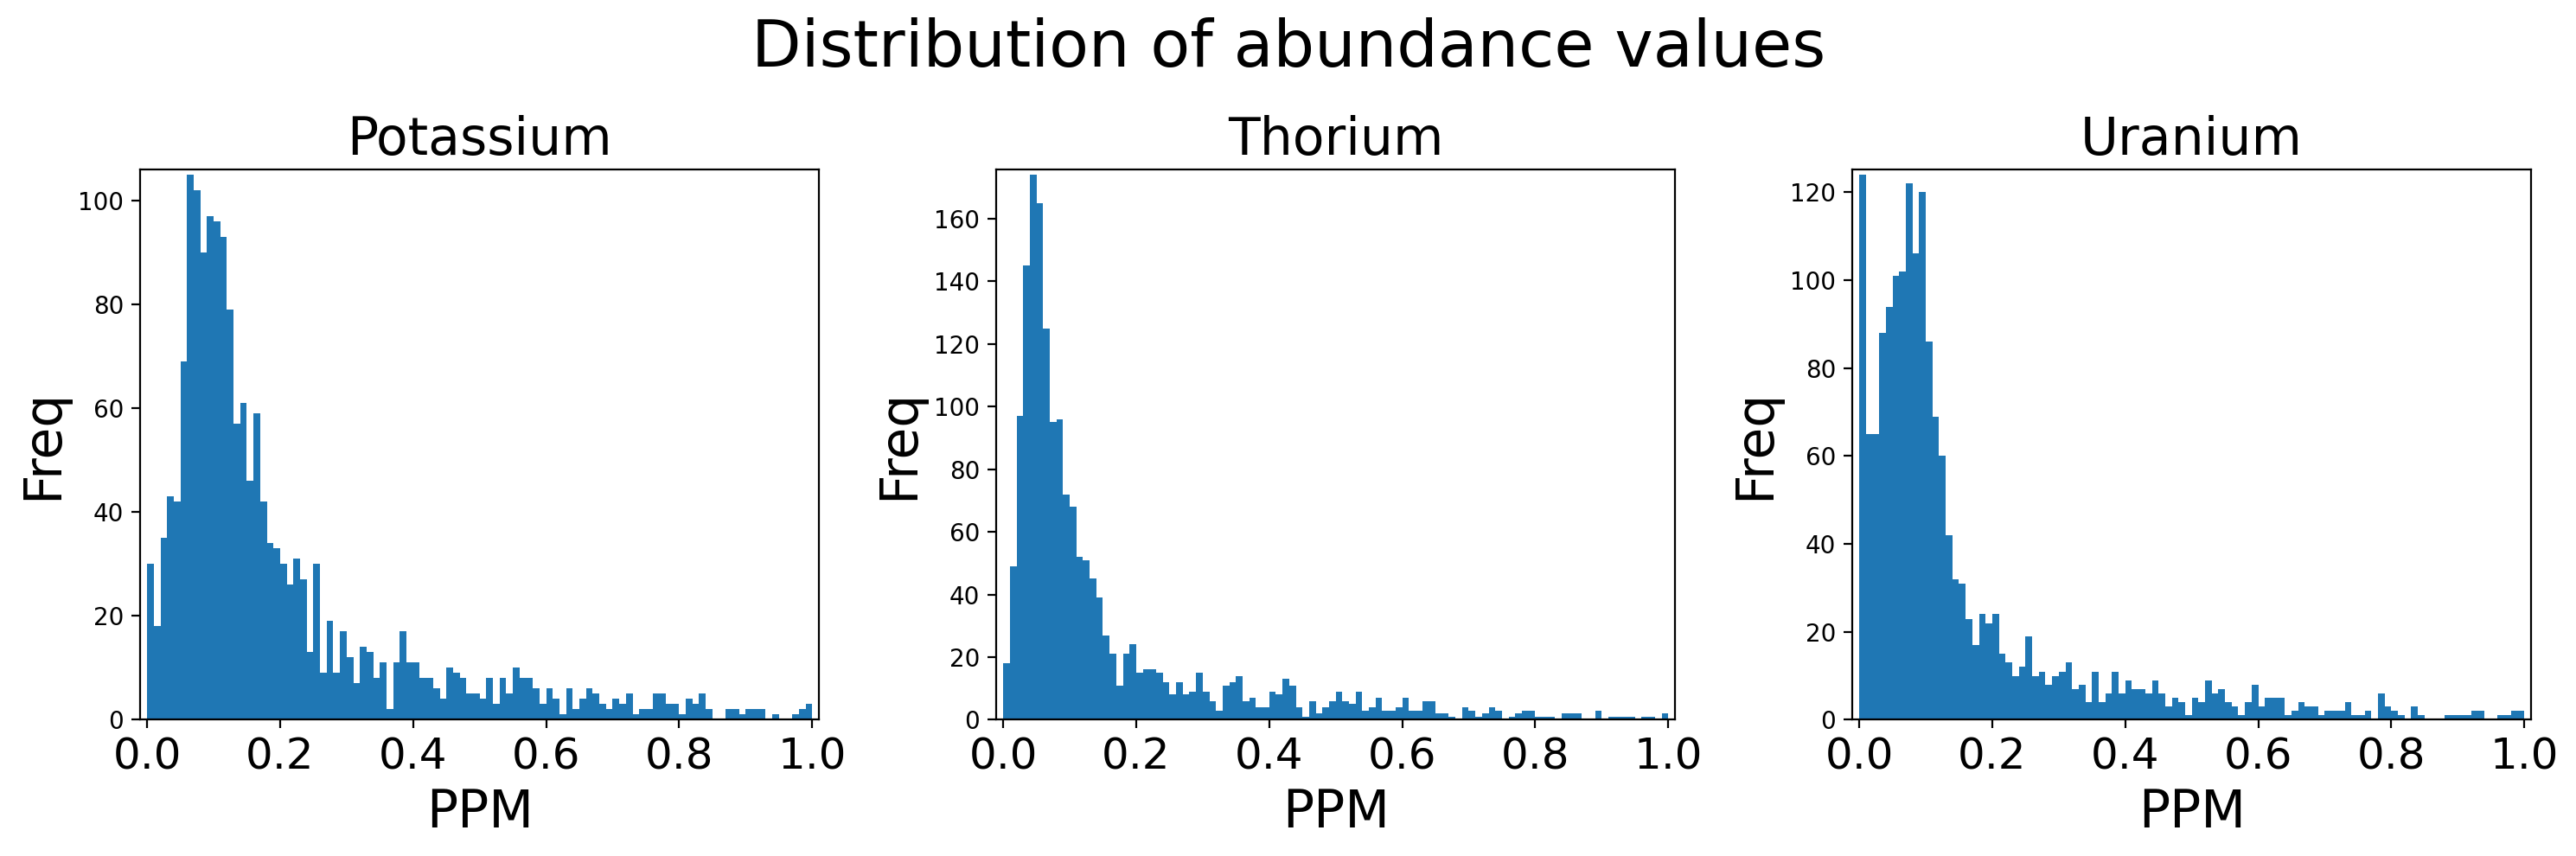

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

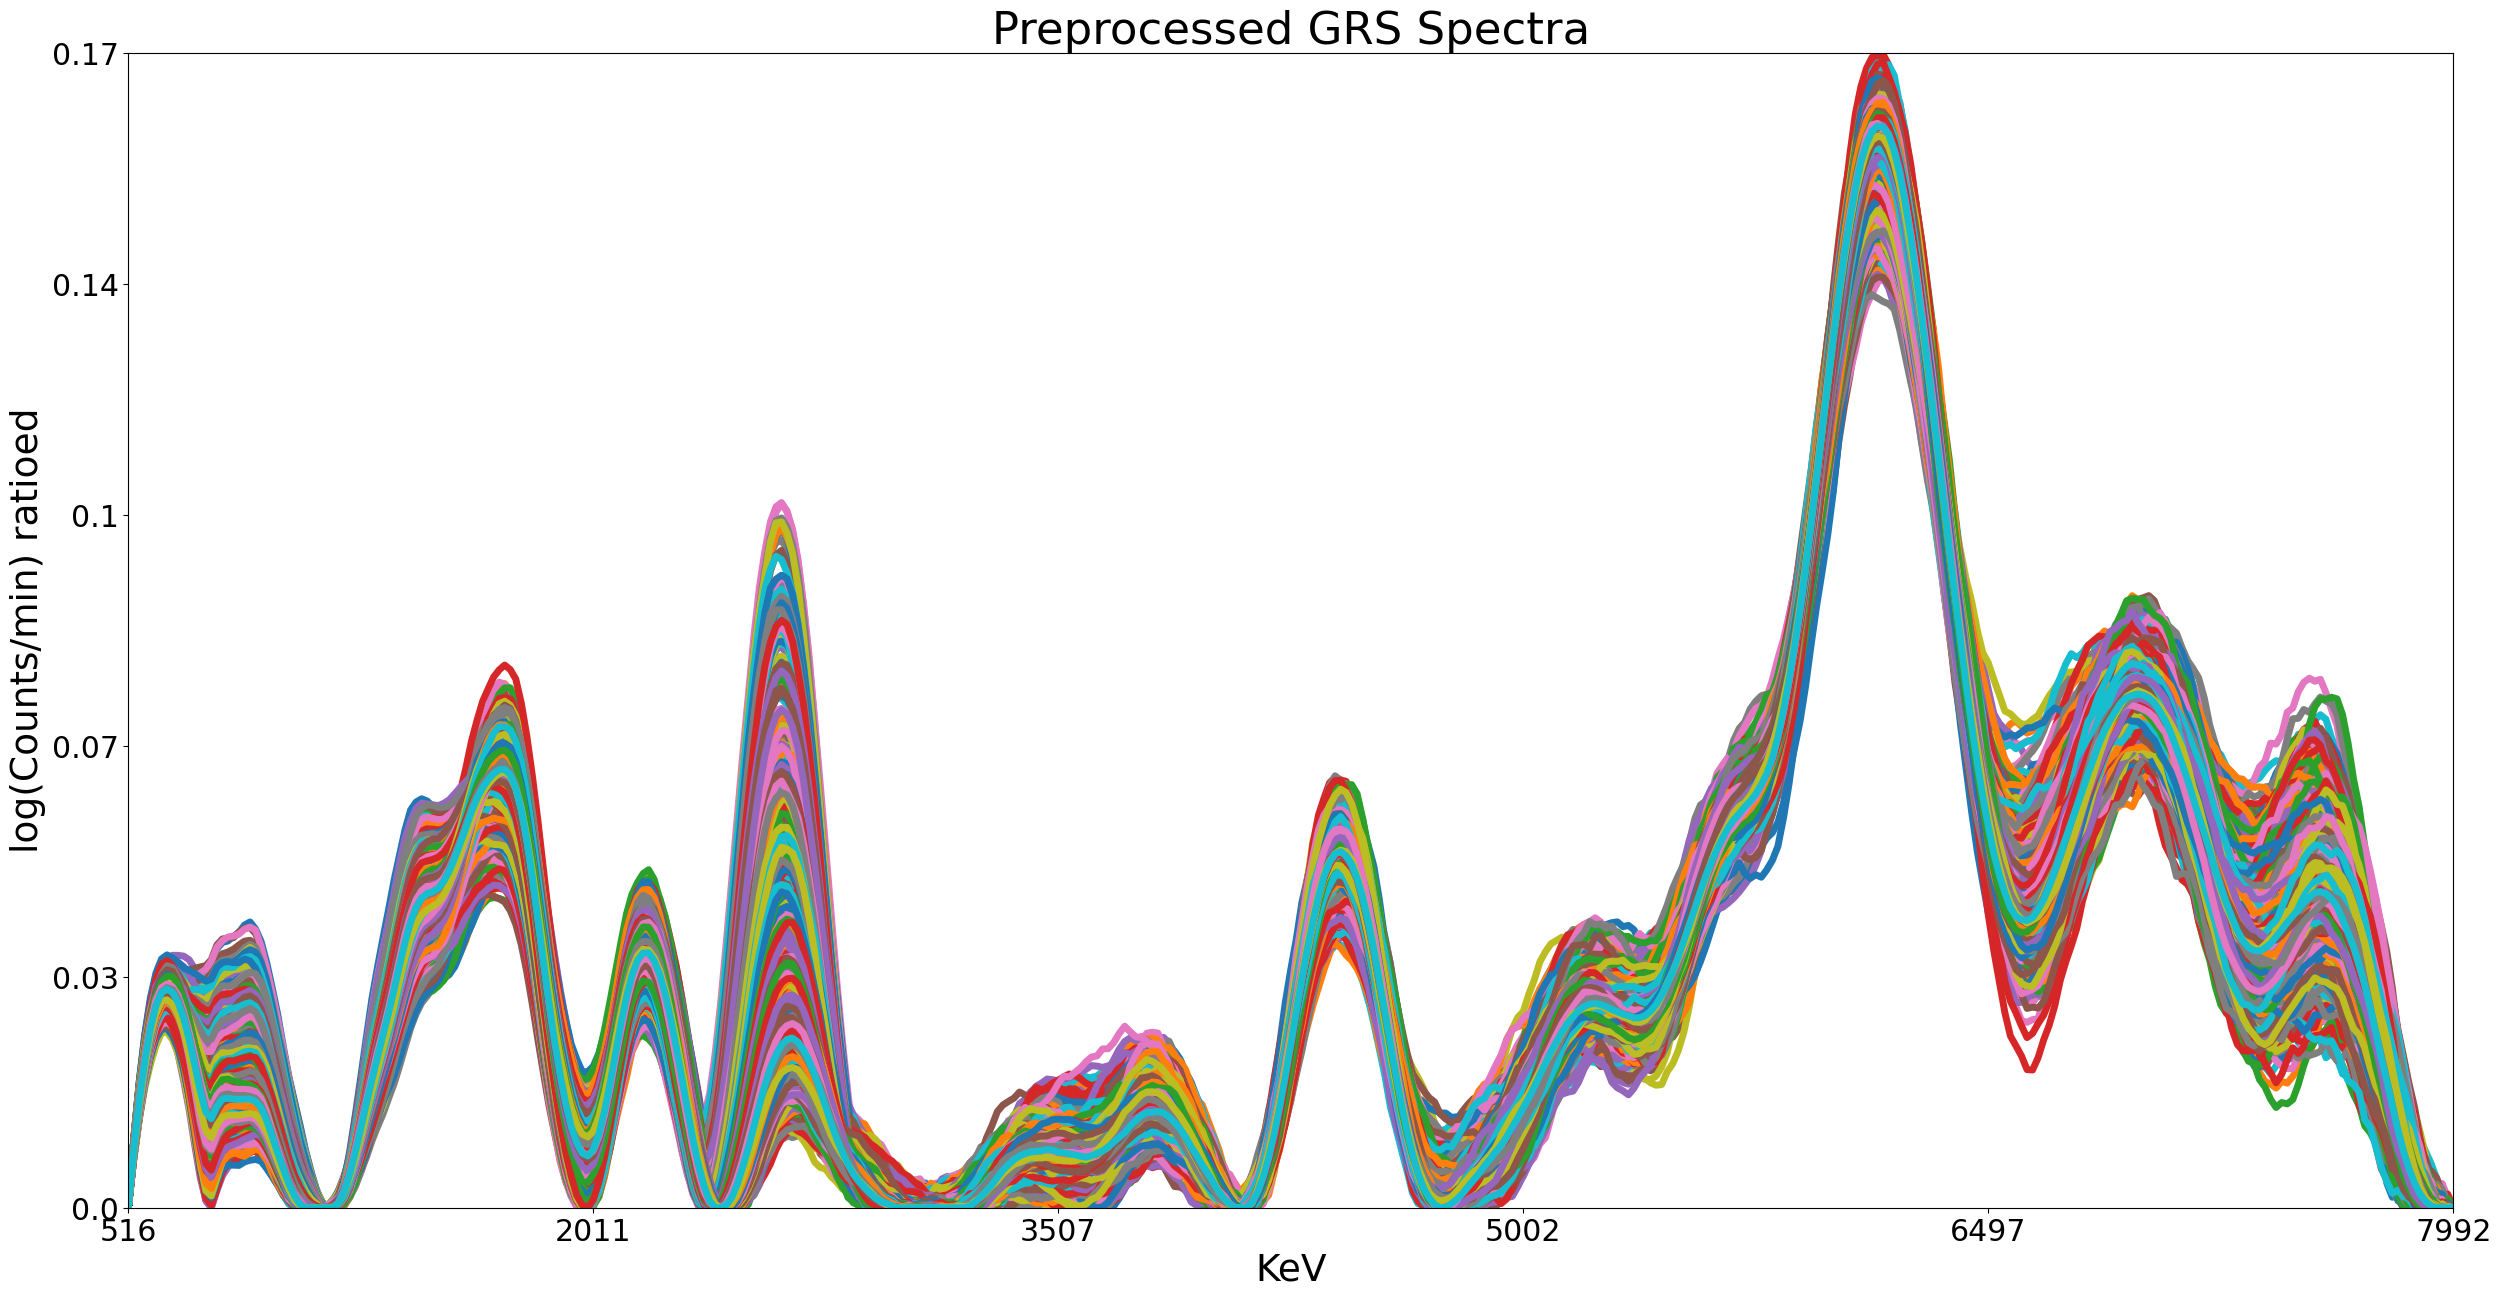

In [23]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [24]:
#import tensorflow
import tensorflow as tf

In [25]:
#set a global seed value
globalSeed=23

In [26]:
#load the pre-trained models
#define a funtion to calculate the Pearsons correlation between two sets of values
def pearson_correlation(x,y):
    x_mean=tf.reduce_mean(x)
    y_mean=tf.reduce_mean(y)
    x_diff=x-x_mean
    y_diff=y-y_mean
    covariance=tf.reduce_mean(tf.multiply(x_diff,y_diff))
    x_std=tf.sqrt(tf.reduce_mean(tf.square(x_diff)))
    y_std=tf.sqrt(tf.reduce_mean(tf.square(y_diff)))
    correlation=covariance/(x_std*y_std)
    return correlation

In [27]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [28]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [29]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, strideactivation function, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,activation,dropoutRate):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    reluActivation=tf.keras.layers.Activation(activation)
    #add the 1st activation layer to the graph
    volume=reluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(0.5,
                                              noise_shape=None,
                                              seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    return volume

In [30]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the activation for each Conv block
activationForEachConvBlock=['relu','relu','relu','relu']
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.5,0.5,0.5,0.5]

In [31]:
#create a NN (Neural Network) graph containing just the input layer
regularElementFeatures=inputLayer
nuclearElementFeatures=inputLayer

In [32]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    regularElementFeatures=createConvolutionalBlock(regularElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    activationForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {regularElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [33]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [34]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2]
#create a list containing the activation for each Conv block
activationForEachConvBlock=['relu','relu','relu']
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.5,0.5,0.5]

In [35]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nuclearElementFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    activationForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)


In [36]:
#Flatten the features for the nuclear elements
nuclearElementFeatures=tf.keras.layers.Flatten()(nuclearElementFeatures)
print(f"Shape of flattened features {nuclearElementFeatures.shape}")

Shape of flattened features (None, 11264)


In [37]:
#get the regular elements' abundances from the generated features
#it consists of three steps
#1. Apply a dense layer with 7 nodes without any activation
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [38]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return tf.math.divide(inputNodes,
                          sampleWiseSums+1e-10,
                          name=name)

In [39]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation=None)(regularElementFeatures)
#compute absolute values
regularElementStage2=tf.math.abs(regularElementStage1)
#add a normalization layer to the network
regularAbundanceEmbedding=estimateAbundances(regularElementStage2,
                                             name="Regular_Abundances")


#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")


Unscaled regular element shape (None, 7)


In [40]:
'''
#add a hidden layer to the nuclear elements' encoder
preElementNodes=tf.keras.layers.Dense(360,activation='relu')(nuclearElementFeatures)
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(preElementNodes)
'''
#get the abundances for the nuclear elements from their features
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(nuclearElementFeatures)
#compute absolute values
nuclearAbundanceEmbedding=tf.math.abs(nuclearElementStage1,name="Nuclear_Abundances")
#print shape of abundances
print(f"Unscaled regular element shape {nuclearAbundanceEmbedding.shape}")

Unscaled regular element shape (None, 3)


In [41]:
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

print(f"All element shape {fullAbundanceEmbedding.shape}")

All element shape (None, 10)


In [42]:
#create a composite constraint to be applied to the weights of the hidden layers which are the weights
class UnitNormNonNegetivityConstraint(tf.keras.constraints.Constraint):
    def __init__(self,axis=0):
        self.axis=axis
    def __call__(self, w):
        w=w*tf.cast(tf.greater_equal(w,0.0),
                    tf.keras.backend.floatx())
        '''
        w=w/(tf.keras.backend.epsilon()+tf.keras.backend.sqrt(tf.reduce_sum(tf.square(w),
                                                                            axis=self.axis,
                                                                            keepdims=True)
                                                             )
            )'''
        return w



#create the composite constraint by combining the two constraints
unitNormNonNegetivityConstraint=UnitNormNonNegetivityConstraint()

In [43]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
for i in range(fullAbundanceEmbedding.shape[-1]):
    temp=tf.keras.layers.Dense(noOfChannels,activation=None,use_bias=False,kernel_constraint=unitNormNonNegetivityConstraint,name=allElementNames[i]+"_Spectra")(tf.expand_dims(fullAbundanceEmbedding[:,i],-1))
    elementWiseHiddenLayers.append(tf.expand_dims(temp,-1))
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {elementWiseHiddenLayers[-1].shape}")

Shape of the spectra outputed by Aluminum (None, 421, 1)
Shape of the spectra outputed by Calcium (None, 421, 1)
Shape of the spectra outputed by Iron (None, 421, 1)
Shape of the spectra outputed by Magnesium (None, 421, 1)
Shape of the spectra outputed by Oxygen (None, 421, 1)
Shape of the spectra outputed by Silicon (None, 421, 1)
Shape of the spectra outputed by Titanium (None, 421, 1)
Shape of the spectra outputed by Potassium (None, 421, 1)
Shape of the spectra outputed by Thorium (None, 421, 1)
Shape of the spectra outputed by Uranium (None, 421, 1)


In [44]:
#add the element wise spectra
linearMixedSpectra=tf.keras.backend.sum(tf.keras.layers.Concatenate(axis=-1)(elementWiseHiddenLayers),
                                        axis=-1,
                                        keepdims=False)
print(f"Shape of the linearly mixed spectra {linearMixedSpectra.shape}")

Shape of the linearly mixed spectra (None, 421)


In [45]:
#apply two dense layers to the network
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation='relu')(linearMixedSpectra)
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation='relu')(nnGraph)
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation=None,name="Reconstruced_Spectra")(nnGraph)

In [46]:
#build the model
unmixingModel=tf.keras.Model(inputs=inputLayer,
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      nnGraph],
                             name="Constrained_Dual_Encoder_Unmxing_Model")

In [47]:
#create the loss function for the embedding, Mean Squared Error
abundanceLossFunction=tf.keras.losses.MeanSquaredError()
#create the loss function for the reconstructed spectra, Cosine loss
recontructedSpectraLoss=tf.keras.losses.CosineSimilarity()
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4,
                                   beta_1=0.5)
#set the number of epochs the model is to be trained for
noOfEpochs=2000
#set the batch size
batchSize=128

#set no. of folds over which the model is to be validated
noOfFolds=5

#define the number of batches to be processed simultaneously
noOfSimultaneousBatches=12

In [48]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=[abundanceLossFunction,abundanceLossFunction,recontructedSpectraLoss],
                      loss_weights=[1e-2,1,1e-5],
                      metrics=[[pearson_correlation],[pearson_correlation],['cosine_similarity']],
                      steps_per_execution=noOfSimultaneousBatches)

In [49]:
#set the address where the untrained model will be saved
untrainedModelAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/untrained_Truly_Constrainted_Dual_Unmixing_Model.h5"

In [50]:
#set the address where the untrained model will be saved
untrainedModelWeightsAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/untrained_Truly_Constrainted_Dual_Unmixing_Model_Weights.h5"

In [51]:
#save the untrained model
unmixingModel.save_weights(untrainedModelWeightsAddress,
                           overwrite=True)

In [52]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [53]:
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [54]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [55]:
#create a list to hold model training history
modelTrainingHistories=[]

In [ ]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    #print the current fold number
    print(f"Starting processing fold {i+1}")
    
    '''
    #load the untrained model
    unmixingModel=tf.keras.models.load_model(untrainedModelAddress,
                                             custom_objects={"CompositeConstraint":CompositeConstraint([nonNegativityConstraint,unitNormConstraint],name="unitNormCompositeConstraint")},
                                             compile=True)
    '''
    
    
    unmixingModel.load_weights(untrainedModelWeightsAddress)
     #compile the model
    unmixingModel.compile(optimizer=optimizer,
                          loss=[abundanceLossFunction,
                                abundanceLossFunction,
                                recontructedSpectraLoss],
                          loss_weights=[1e-2,1,1e-5],
                          metrics=[[pearson_correlation],
                                   [pearson_correlation],
                                   ['cosine_similarity']],
                          steps_per_execution=noOfSimultaneousBatches)
    
    #fit the model to the current fold's data
    currentModelTrainingHistory=unmixingModel.fit(x=preprocessedSpectra[trainingIndices,:],
                                                            y=[regularElementalAbundances[trainingIndices,:],
                                                               nuclearElementalAbundances[trainingIndices,:],
                                                               preprocessedSpectra[trainingIndices,:]],
                                                            batch_size=batchSize,
                                                            epochs=noOfEpochs,
                                                            validation_data=(preprocessedSpectra[testingIndices,:],
                                                                             [regularElementalAbundances[testingIndices,:],
                                                                              nuclearElementalAbundances[testingIndices,:],
                                                                              preprocessedSpectra[testingIndices,:]]),
                                                            validation_freq=1)
                                                            
    
    #save the training history of the current model
    modelTrainingHistories.append(currentModelTrainingHistory)
    
    

    #set the address where the untrained model will be saved
    trainedModelWeightsAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/trained_Truly_Constrainted_Dual_Unmixing_Model_Weights_for_"+str(i+1)+"_Fold.h5"
    
    #save the untrained model
    unmixingModel.save_weights(trainedModelWeightsAddress,
                               overwrite=True)
    
    
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=500,
                         sharex=True,
                         sharey=False)

#iterate through all the elements
for i in range(len(allElementNames)):
    
    #get the name of the current element
    currentElementName=allElementNames[i]
    
    #get the mean spectrum for the current element
    currentElementSpectrum=unmixingModel.get_layer(allElementNames[i]+"_Spectra").get_weights()[0][0]
    
    #plot the spectrum
    axes[i//5,i%5].bar(relaventEnergyBands,
                       currentElementSpectrum,
                       width=10)
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName+" ρ="+str(round(elementWiseCorrelation[i],2)),
                             fontsize=baseFontSize*1.2)
    
    #set the margin
    axes[i//5,i%5].margins(0.01)
    
    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)
        
    #add yticks and label
        
        
    axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(currentElementSpectrum)+np.ptp(currentElementSpectrum)/noOfYticks,
                                np.ptp(currentElementSpectrum)/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(currentElementSpectrum)+np.ptp(currentElementSpectrum)/noOfYticks,
                                                np.ptp(currentElementSpectrum)/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle("fElement-wise Learnt spectra for {i}th Fold",
                fontsize=baseFontSize*1.5)


Starting processing fold 1
Epoch 1/2000
12/12 [==============================] - 10s 860ms/step - loss: 3.2781 - tf.math.divide_loss: 0.0279 - tf.math.abs_1_loss: 3.2778 - Reconstruced_Spectra_loss: -0.0620 - tf.math.divide_pearson_correlation: 0.0682 - tf.math.abs_1_pearson_correlation: -0.0171 - Reconstruced_Spectra_cosine_similarity: 0.0620 - val_loss: 0.0635 - val_tf.math.divide_loss: 0.0057 - val_tf.math.abs_1_loss: 0.0635 - val_Reconstruced_Spectra_loss: -0.0730 - val_tf.math.divide_pearson_correlation: 0.8703 - val_tf.math.abs_1_pearson_correlation: 0.1300 - val_Reconstruced_Spectra_cosine_similarity: 0.0730
Epoch 2/2000
12/12 [==============================] - 1s 78ms/step - loss: 3.0795 - tf.math.divide_loss: 0.0106 - tf.math.abs_1_loss: 3.0794 - Reconstruced_Spectra_loss: -0.0961 - tf.math.divide_pearson_correlation: 0.7153 - tf.math.abs_1_pearson_correlation: -0.0031 - Reconstruced_Spectra_cosine_similarity: 0.0961 - val_loss: 0.0590 - val_tf.math.divide_loss: 0.0029 - val_t

Epoch 15/2000
12/12 [==============================] - 1s 81ms/step - loss: 1.7663 - tf.math.divide_loss: 0.0016 - tf.math.abs_1_loss: 1.7663 - Reconstruced_Spectra_loss: -0.7453 - tf.math.divide_pearson_correlation: 0.9582 - tf.math.abs_1_pearson_correlation: -0.0103 - Reconstruced_Spectra_cosine_similarity: 0.7453 - val_loss: 0.0471 - val_tf.math.divide_loss: 0.0022 - val_tf.math.abs_1_loss: 0.0471 - val_Reconstruced_Spectra_loss: -0.8442 - val_tf.math.divide_pearson_correlation: 0.9435 - val_tf.math.abs_1_pearson_correlation: 0.1008 - val_Reconstruced_Spectra_cosine_similarity: 0.8442
Epoch 16/2000
12/12 [==============================] - 1s 79ms/step - loss: 1.6102 - tf.math.divide_loss: 0.0016 - tf.math.abs_1_loss: 1.6102 - Reconstruced_Spectra_loss: -0.7761 - tf.math.divide_pearson_correlation: 0.9589 - tf.math.abs_1_pearson_correlation: -0.0304 - Reconstruced_Spectra_cosine_similarity: 0.7761 - val_loss: 0.0451 - val_tf.math.divide_loss: 0.0021 - val_tf.math.abs_1_loss: 0.0451 -

Epoch 29/2000
12/12 [==============================] - 1s 80ms/step - loss: 1.0441 - tf.math.divide_loss: 9.0468e-04 - tf.math.abs_1_loss: 1.0441 - Reconstruced_Spectra_loss: -0.9558 - tf.math.divide_pearson_correlation: 0.9761 - tf.math.abs_1_pearson_correlation: 0.0078 - Reconstruced_Spectra_cosine_similarity: 0.9558 - val_loss: 0.0807 - val_tf.math.divide_loss: 0.0015 - val_tf.math.abs_1_loss: 0.0807 - val_Reconstruced_Spectra_loss: -0.9744 - val_tf.math.divide_pearson_correlation: 0.9694 - val_tf.math.abs_1_pearson_correlation: 0.1087 - val_Reconstruced_Spectra_cosine_similarity: 0.9744
Epoch 30/2000
12/12 [==============================] - 1s 80ms/step - loss: 1.0148 - tf.math.divide_loss: 8.8990e-04 - tf.math.abs_1_loss: 1.0148 - Reconstruced_Spectra_loss: -0.9602 - tf.math.divide_pearson_correlation: 0.9765 - tf.math.abs_1_pearson_correlation: -0.0055 - Reconstruced_Spectra_cosine_similarity: 0.9602 - val_loss: 0.0640 - val_tf.math.divide_loss: 0.0014 - val_tf.math.abs_1_loss: 0

Epoch 43/2000
12/12 [==============================] - 1s 80ms/step - loss: 0.6380 - tf.math.divide_loss: 6.6254e-04 - tf.math.abs_1_loss: 0.6380 - Reconstruced_Spectra_loss: -0.9832 - tf.math.divide_pearson_correlation: 0.9824 - tf.math.abs_1_pearson_correlation: 0.0333 - Reconstruced_Spectra_cosine_similarity: 0.9832 - val_loss: 0.0564 - val_tf.math.divide_loss: 6.2371e-04 - val_tf.math.abs_1_loss: 0.0564 - val_Reconstruced_Spectra_loss: -0.9729 - val_tf.math.divide_pearson_correlation: 0.9876 - val_tf.math.abs_1_pearson_correlation: 0.0909 - val_Reconstruced_Spectra_cosine_similarity: 0.9729
Epoch 44/2000
12/12 [==============================] - 1s 81ms/step - loss: 0.6204 - tf.math.divide_loss: 6.5009e-04 - tf.math.abs_1_loss: 0.6204 - Reconstruced_Spectra_loss: -0.9835 - tf.math.divide_pearson_correlation: 0.9829 - tf.math.abs_1_pearson_correlation: 0.0016 - Reconstruced_Spectra_cosine_similarity: 0.9835 - val_loss: 0.0559 - val_tf.math.divide_loss: 6.1087e-04 - val_tf.math.abs_1_

Epoch 57/2000
12/12 [==============================] - 1s 82ms/step - loss: 0.3864 - tf.math.divide_loss: 5.1857e-04 - tf.math.abs_1_loss: 0.3864 - Reconstruced_Spectra_loss: -0.9884 - tf.math.divide_pearson_correlation: 0.9865 - tf.math.abs_1_pearson_correlation: 0.0167 - Reconstruced_Spectra_cosine_similarity: 0.9884 - val_loss: 0.0378 - val_tf.math.divide_loss: 2.9898e-04 - val_tf.math.abs_1_loss: 0.0378 - val_Reconstruced_Spectra_loss: -0.9793 - val_tf.math.divide_pearson_correlation: 0.9923 - val_tf.math.abs_1_pearson_correlation: 0.2397 - val_Reconstruced_Spectra_cosine_similarity: 0.9793
Epoch 58/2000
12/12 [==============================] - 1s 82ms/step - loss: 0.3935 - tf.math.divide_loss: 5.0757e-04 - tf.math.abs_1_loss: 0.3935 - Reconstruced_Spectra_loss: -0.9888 - tf.math.divide_pearson_correlation: 0.9864 - tf.math.abs_1_pearson_correlation: -0.0112 - Reconstruced_Spectra_cosine_similarity: 0.9888 - val_loss: 0.0481 - val_tf.math.divide_loss: 3.0071e-04 - val_tf.math.abs_1

Epoch 71/2000
12/12 [==============================] - 1s 84ms/step - loss: 0.2711 - tf.math.divide_loss: 4.4794e-04 - tf.math.abs_1_loss: 0.2711 - Reconstruced_Spectra_loss: -0.9909 - tf.math.divide_pearson_correlation: 0.9881 - tf.math.abs_1_pearson_correlation: 0.0354 - Reconstruced_Spectra_cosine_similarity: 0.9909 - val_loss: 0.0482 - val_tf.math.divide_loss: 2.4104e-04 - val_tf.math.abs_1_loss: 0.0482 - val_Reconstruced_Spectra_loss: -0.9842 - val_tf.math.divide_pearson_correlation: 0.9936 - val_tf.math.abs_1_pearson_correlation: -0.0334 - val_Reconstruced_Spectra_cosine_similarity: 0.9842
Epoch 72/2000
12/12 [==============================] - 1s 83ms/step - loss: 0.2582 - tf.math.divide_loss: 4.4829e-04 - tf.math.abs_1_loss: 0.2582 - Reconstruced_Spectra_loss: -0.9910 - tf.math.divide_pearson_correlation: 0.9883 - tf.math.abs_1_pearson_correlation: 0.0084 - Reconstruced_Spectra_cosine_similarity: 0.9910 - val_loss: 0.0538 - val_tf.math.divide_loss: 2.4223e-04 - val_tf.math.abs_1

Epoch 85/2000
12/12 [==============================] - 1s 85ms/step - loss: 0.1862 - tf.math.divide_loss: 3.8952e-04 - tf.math.abs_1_loss: 0.1862 - Reconstruced_Spectra_loss: -0.9921 - tf.math.divide_pearson_correlation: 0.9895 - tf.math.abs_1_pearson_correlation: 0.0165 - Reconstruced_Spectra_cosine_similarity: 0.9921 - val_loss: 0.0593 - val_tf.math.divide_loss: 2.2645e-04 - val_tf.math.abs_1_loss: 0.0593 - val_Reconstruced_Spectra_loss: -0.9801 - val_tf.math.divide_pearson_correlation: 0.9941 - val_tf.math.abs_1_pearson_correlation: 0.1333 - val_Reconstruced_Spectra_cosine_similarity: 0.9801
Epoch 86/2000
12/12 [==============================] - 1s 84ms/step - loss: 0.1815 - tf.math.divide_loss: 3.9213e-04 - tf.math.abs_1_loss: 0.1815 - Reconstruced_Spectra_loss: -0.9921 - tf.math.divide_pearson_correlation: 0.9895 - tf.math.abs_1_pearson_correlation: -0.0236 - Reconstruced_Spectra_cosine_similarity: 0.9921 - val_loss: 0.0487 - val_tf.math.divide_loss: 2.2516e-04 - val_tf.math.abs_1

Epoch 99/2000
12/12 [==============================] - 1s 85ms/step - loss: 0.1245 - tf.math.divide_loss: 3.5833e-04 - tf.math.abs_1_loss: 0.1245 - Reconstruced_Spectra_loss: -0.9929 - tf.math.divide_pearson_correlation: 0.9906 - tf.math.abs_1_pearson_correlation: 0.0183 - Reconstruced_Spectra_cosine_similarity: 0.9929 - val_loss: 0.0616 - val_tf.math.divide_loss: 2.1968e-04 - val_tf.math.abs_1_loss: 0.0616 - val_Reconstruced_Spectra_loss: -0.9930 - val_tf.math.divide_pearson_correlation: 0.9943 - val_tf.math.abs_1_pearson_correlation: 0.1357 - val_Reconstruced_Spectra_cosine_similarity: 0.9930
Epoch 100/2000
12/12 [==============================] - 1s 87ms/step - loss: 0.1334 - tf.math.divide_loss: 3.6372e-04 - tf.math.abs_1_loss: 0.1334 - Reconstruced_Spectra_loss: -0.9929 - tf.math.divide_pearson_correlation: 0.9903 - tf.math.abs_1_pearson_correlation: 0.0301 - Reconstruced_Spectra_cosine_similarity: 0.9929 - val_loss: 0.0447 - val_tf.math.divide_loss: 2.1597e-04 - val_tf.math.abs_1

Epoch 113/2000
12/12 [==============================] - 1s 88ms/step - loss: 0.1008 - tf.math.divide_loss: 3.2242e-04 - tf.math.abs_1_loss: 0.1008 - Reconstruced_Spectra_loss: -0.9933 - tf.math.divide_pearson_correlation: 0.9915 - tf.math.abs_1_pearson_correlation: 0.0209 - Reconstruced_Spectra_cosine_similarity: 0.9933 - val_loss: 0.0420 - val_tf.math.divide_loss: 2.0931e-04 - val_tf.math.abs_1_loss: 0.0420 - val_Reconstruced_Spectra_loss: -0.9924 - val_tf.math.divide_pearson_correlation: 0.9946 - val_tf.math.abs_1_pearson_correlation: 0.1236 - val_Reconstruced_Spectra_cosine_similarity: 0.9924
Epoch 114/2000
12/12 [==============================] - 1s 91ms/step - loss: 0.0980 - tf.math.divide_loss: 3.3405e-04 - tf.math.abs_1_loss: 0.0981 - Reconstruced_Spectra_loss: -0.9934 - tf.math.divide_pearson_correlation: 0.9911 - tf.math.abs_1_pearson_correlation: 0.0397 - Reconstruced_Spectra_cosine_similarity: 0.9934 - val_loss: 0.0444 - val_tf.math.divide_loss: 2.0629e-04 - val_tf.math.abs_

Epoch 127/2000
12/12 [==============================] - 1s 88ms/step - loss: 0.0786 - tf.math.divide_loss: 3.0844e-04 - tf.math.abs_1_loss: 0.0786 - Reconstruced_Spectra_loss: -0.9937 - tf.math.divide_pearson_correlation: 0.9916 - tf.math.abs_1_pearson_correlation: 0.0945 - Reconstruced_Spectra_cosine_similarity: 0.9937 - val_loss: 0.0351 - val_tf.math.divide_loss: 2.0220e-04 - val_tf.math.abs_1_loss: 0.0351 - val_Reconstruced_Spectra_loss: -0.9927 - val_tf.math.divide_pearson_correlation: 0.9948 - val_tf.math.abs_1_pearson_correlation: 0.4675 - val_Reconstruced_Spectra_cosine_similarity: 0.9927
Epoch 128/2000
12/12 [==============================] - 1s 89ms/step - loss: 0.0785 - tf.math.divide_loss: 3.0724e-04 - tf.math.abs_1_loss: 0.0785 - Reconstruced_Spectra_loss: -0.9937 - tf.math.divide_pearson_correlation: 0.9921 - tf.math.abs_1_pearson_correlation: 0.0735 - Reconstruced_Spectra_cosine_similarity: 0.9937 - val_loss: 0.0407 - val_tf.math.divide_loss: 2.0198e-04 - val_tf.math.abs_

Epoch 141/2000
12/12 [==============================] - 1s 93ms/step - loss: 0.0652 - tf.math.divide_loss: 3.0571e-04 - tf.math.abs_1_loss: 0.0652 - Reconstruced_Spectra_loss: -0.9939 - tf.math.divide_pearson_correlation: 0.9919 - tf.math.abs_1_pearson_correlation: 0.1806 - Reconstruced_Spectra_cosine_similarity: 0.9939 - val_loss: 0.0276 - val_tf.math.divide_loss: 1.9441e-04 - val_tf.math.abs_1_loss: 0.0276 - val_Reconstruced_Spectra_loss: -0.9936 - val_tf.math.divide_pearson_correlation: 0.9949 - val_tf.math.abs_1_pearson_correlation: 0.5175 - val_Reconstruced_Spectra_cosine_similarity: 0.9936
Epoch 142/2000
12/12 [==============================] - 1s 89ms/step - loss: 0.0634 - tf.math.divide_loss: 2.8787e-04 - tf.math.abs_1_loss: 0.0634 - Reconstruced_Spectra_loss: -0.9938 - tf.math.divide_pearson_correlation: 0.9923 - tf.math.abs_1_pearson_correlation: 0.1944 - Reconstruced_Spectra_cosine_similarity: 0.9938 - val_loss: 0.0270 - val_tf.math.divide_loss: 1.9784e-04 - val_tf.math.abs_

Epoch 155/2000
12/12 [==============================] - 1s 91ms/step - loss: 0.0563 - tf.math.divide_loss: 2.7967e-04 - tf.math.abs_1_loss: 0.0563 - Reconstruced_Spectra_loss: -0.9940 - tf.math.divide_pearson_correlation: 0.9927 - tf.math.abs_1_pearson_correlation: 0.2422 - Reconstruced_Spectra_cosine_similarity: 0.9940 - val_loss: 0.0283 - val_tf.math.divide_loss: 1.9229e-04 - val_tf.math.abs_1_loss: 0.0283 - val_Reconstruced_Spectra_loss: -0.9940 - val_tf.math.divide_pearson_correlation: 0.9950 - val_tf.math.abs_1_pearson_correlation: 0.5194 - val_Reconstruced_Spectra_cosine_similarity: 0.9940
Epoch 156/2000
12/12 [==============================] - 1s 91ms/step - loss: 0.0573 - tf.math.divide_loss: 2.8094e-04 - tf.math.abs_1_loss: 0.0573 - Reconstruced_Spectra_loss: -0.9940 - tf.math.divide_pearson_correlation: 0.9928 - tf.math.abs_1_pearson_correlation: 0.2332 - Reconstruced_Spectra_cosine_similarity: 0.9940 - val_loss: 0.0180 - val_tf.math.divide_loss: 1.8857e-04 - val_tf.math.abs_

Epoch 169/2000
12/12 [==============================] - 1s 91ms/step - loss: 0.0504 - tf.math.divide_loss: 2.6686e-04 - tf.math.abs_1_loss: 0.0504 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9931 - tf.math.abs_1_pearson_correlation: 0.3243 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0327 - val_tf.math.divide_loss: 1.8691e-04 - val_tf.math.abs_1_loss: 0.0327 - val_Reconstruced_Spectra_loss: -0.9941 - val_tf.math.divide_pearson_correlation: 0.9952 - val_tf.math.abs_1_pearson_correlation: 0.8506 - val_Reconstruced_Spectra_cosine_similarity: 0.9941
Epoch 170/2000
12/12 [==============================] - 1s 89ms/step - loss: 0.0480 - tf.math.divide_loss: 2.6279e-04 - tf.math.abs_1_loss: 0.0480 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9932 - tf.math.abs_1_pearson_correlation: 0.3358 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0176 - val_tf.math.divide_loss: 1.8553e-04 - val_tf.math.abs_

Epoch 183/2000
12/12 [==============================] - 1s 91ms/step - loss: 0.0430 - tf.math.divide_loss: 2.5696e-04 - tf.math.abs_1_loss: 0.0430 - Reconstruced_Spectra_loss: -0.9943 - tf.math.divide_pearson_correlation: 0.9932 - tf.math.abs_1_pearson_correlation: 0.3952 - Reconstruced_Spectra_cosine_similarity: 0.9943 - val_loss: 0.0128 - val_tf.math.divide_loss: 1.8461e-04 - val_tf.math.abs_1_loss: 0.0128 - val_Reconstruced_Spectra_loss: -0.9944 - val_tf.math.divide_pearson_correlation: 0.9952 - val_tf.math.abs_1_pearson_correlation: 0.8730 - val_Reconstruced_Spectra_cosine_similarity: 0.9944
Epoch 184/2000
12/12 [==============================] - 1s 95ms/step - loss: 0.0420 - tf.math.divide_loss: 2.5605e-04 - tf.math.abs_1_loss: 0.0420 - Reconstruced_Spectra_loss: -0.9943 - tf.math.divide_pearson_correlation: 0.9933 - tf.math.abs_1_pearson_correlation: 0.3950 - Reconstruced_Spectra_cosine_similarity: 0.9943 - val_loss: 0.0115 - val_tf.math.divide_loss: 1.8237e-04 - val_tf.math.abs_

Epoch 197/2000
12/12 [==============================] - 1s 92ms/step - loss: 0.0386 - tf.math.divide_loss: 2.4524e-04 - tf.math.abs_1_loss: 0.0386 - Reconstruced_Spectra_loss: -0.9944 - tf.math.divide_pearson_correlation: 0.9936 - tf.math.abs_1_pearson_correlation: 0.4481 - Reconstruced_Spectra_cosine_similarity: 0.9944 - val_loss: 0.0089 - val_tf.math.divide_loss: 1.7904e-04 - val_tf.math.abs_1_loss: 0.0089 - val_Reconstruced_Spectra_loss: -0.9945 - val_tf.math.divide_pearson_correlation: 0.9953 - val_tf.math.abs_1_pearson_correlation: 0.9045 - val_Reconstruced_Spectra_cosine_similarity: 0.9945
Epoch 198/2000
12/12 [==============================] - 1s 96ms/step - loss: 0.0376 - tf.math.divide_loss: 2.4461e-04 - tf.math.abs_1_loss: 0.0376 - Reconstruced_Spectra_loss: -0.9945 - tf.math.divide_pearson_correlation: 0.9935 - tf.math.abs_1_pearson_correlation: 0.4664 - Reconstruced_Spectra_cosine_similarity: 0.9945 - val_loss: 0.0349 - val_tf.math.divide_loss: 1.7987e-04 - val_tf.math.abs_

Epoch 211/2000
12/12 [==============================] - 1s 93ms/step - loss: 0.0348 - tf.math.divide_loss: 2.4207e-04 - tf.math.abs_1_loss: 0.0348 - Reconstruced_Spectra_loss: -0.9945 - tf.math.divide_pearson_correlation: 0.9936 - tf.math.abs_1_pearson_correlation: 0.4721 - Reconstruced_Spectra_cosine_similarity: 0.9945 - val_loss: 0.0189 - val_tf.math.divide_loss: 1.7955e-04 - val_tf.math.abs_1_loss: 0.0189 - val_Reconstruced_Spectra_loss: -0.9945 - val_tf.math.divide_pearson_correlation: 0.9953 - val_tf.math.abs_1_pearson_correlation: 0.8038 - val_Reconstruced_Spectra_cosine_similarity: 0.9945
Epoch 212/2000
12/12 [==============================] - 1s 93ms/step - loss: 0.0340 - tf.math.divide_loss: 2.4376e-04 - tf.math.abs_1_loss: 0.0340 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9937 - tf.math.abs_1_pearson_correlation: 0.4809 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0084 - val_tf.math.divide_loss: 1.7832e-04 - val_tf.math.abs_

Epoch 225/2000
12/12 [==============================] - 1s 95ms/step - loss: 0.0297 - tf.math.divide_loss: 2.3209e-04 - tf.math.abs_1_loss: 0.0297 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9939 - tf.math.abs_1_pearson_correlation: 0.5525 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0070 - val_tf.math.divide_loss: 1.7746e-04 - val_tf.math.abs_1_loss: 0.0071 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9954 - val_tf.math.abs_1_pearson_correlation: 0.9114 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 226/2000
12/12 [==============================] - 1s 95ms/step - loss: 0.0295 - tf.math.divide_loss: 2.3214e-04 - tf.math.abs_1_loss: 0.0295 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9939 - tf.math.abs_1_pearson_correlation: 0.5615 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0080 - val_tf.math.divide_loss: 1.7605e-04 - val_tf.math.abs_

Epoch 239/2000
12/12 [==============================] - 1s 95ms/step - loss: 0.0290 - tf.math.divide_loss: 2.2470e-04 - tf.math.abs_1_loss: 0.0290 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9941 - tf.math.abs_1_pearson_correlation: 0.5489 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0131 - val_tf.math.divide_loss: 1.7633e-04 - val_tf.math.abs_1_loss: 0.0132 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9954 - val_tf.math.abs_1_pearson_correlation: 0.7682 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 240/2000
12/12 [==============================] - 1s 95ms/step - loss: 0.0287 - tf.math.divide_loss: 2.2127e-04 - tf.math.abs_1_loss: 0.0287 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9942 - tf.math.abs_1_pearson_correlation: 0.6204 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.7546e-04 - val_tf.math.abs_

Epoch 253/2000
12/12 [==============================] - 1s 96ms/step - loss: 0.0253 - tf.math.divide_loss: 2.2233e-04 - tf.math.abs_1_loss: 0.0253 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9941 - tf.math.abs_1_pearson_correlation: 0.6436 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.7497e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9954 - val_tf.math.abs_1_pearson_correlation: 0.9586 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 254/2000
12/12 [==============================] - 1s 94ms/step - loss: 0.0264 - tf.math.divide_loss: 2.1895e-04 - tf.math.abs_1_loss: 0.0264 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.6126 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0089 - val_tf.math.divide_loss: 1.7450e-04 - val_tf.math.abs_

Epoch 267/2000
12/12 [==============================] - 1s 98ms/step - loss: 0.0267 - tf.math.divide_loss: 2.2297e-04 - tf.math.abs_1_loss: 0.0267 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9942 - tf.math.abs_1_pearson_correlation: 0.5743 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.7565e-04 - val_tf.math.abs_1_loss: 0.0065 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9954 - val_tf.math.abs_1_pearson_correlation: 0.9281 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 268/2000
12/12 [==============================] - 1s 97ms/step - loss: 0.0254 - tf.math.divide_loss: 2.1196e-04 - tf.math.abs_1_loss: 0.0254 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.5992 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.7337e-04 - val_tf.math.abs_

Epoch 281/2000
12/12 [==============================] - 1s 94ms/step - loss: 0.0248 - tf.math.divide_loss: 2.1027e-04 - tf.math.abs_1_loss: 0.0248 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.6402 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.7415e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9955 - val_tf.math.abs_1_pearson_correlation: 0.9659 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 282/2000
12/12 [==============================] - 1s 96ms/step - loss: 0.0222 - tf.math.divide_loss: 2.1296e-04 - tf.math.abs_1_loss: 0.0222 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.6727 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.7168e-04 - val_tf.math.abs_

Epoch 295/2000
12/12 [==============================] - 1s 97ms/step - loss: 0.0215 - tf.math.divide_loss: 2.0433e-04 - tf.math.abs_1_loss: 0.0216 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.6877 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.7120e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.9411 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 296/2000
12/12 [==============================] - 1s 96ms/step - loss: 0.0195 - tf.math.divide_loss: 2.1306e-04 - tf.math.abs_1_loss: 0.0196 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.7068 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.7208e-04 - val_tf.math.abs_

Epoch 309/2000
12/12 [==============================] - 1s 96ms/step - loss: 0.0217 - tf.math.divide_loss: 2.0346e-04 - tf.math.abs_1_loss: 0.0218 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.6580 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0080 - val_tf.math.divide_loss: 1.6961e-04 - val_tf.math.abs_1_loss: 0.0080 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.8500 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 310/2000
12/12 [==============================] - 1s 96ms/step - loss: 0.0202 - tf.math.divide_loss: 2.0114e-04 - tf.math.abs_1_loss: 0.0202 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.6861 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.6946e-04 - val_tf.math.abs_

Epoch 323/2000
12/12 [==============================] - 1s 98ms/step - loss: 0.0190 - tf.math.divide_loss: 2.0618e-04 - tf.math.abs_1_loss: 0.0190 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.7107 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.6713e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.9023 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 324/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0210 - tf.math.divide_loss: 2.0391e-04 - tf.math.abs_1_loss: 0.0210 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.6796 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.6788e-04 - val_tf.math.abs

Epoch 337/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0170 - tf.math.divide_loss: 1.9989e-04 - tf.math.abs_1_loss: 0.0170 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.7315 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.6611e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.9076 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 338/2000
12/12 [==============================] - 1s 98ms/step - loss: 0.0168 - tf.math.divide_loss: 1.9741e-04 - tf.math.abs_1_loss: 0.0168 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.7457 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.6784e-04 - val_tf.math.abs_

Epoch 351/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0177 - tf.math.divide_loss: 1.8968e-04 - tf.math.abs_1_loss: 0.0177 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.7412 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.6454e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.9513 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 352/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0158 - tf.math.divide_loss: 1.9532e-04 - tf.math.abs_1_loss: 0.0158 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.7652 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.6625e-04 - val_tf.math.abs

Epoch 365/2000
12/12 [==============================] - 1s 97ms/step - loss: 0.0149 - tf.math.divide_loss: 1.9184e-04 - tf.math.abs_1_loss: 0.0150 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.7479 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.6501e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.9591 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 366/2000
12/12 [==============================] - 1s 97ms/step - loss: 0.0155 - tf.math.divide_loss: 1.8947e-04 - tf.math.abs_1_loss: 0.0155 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.7554 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0102 - val_tf.math.divide_loss: 1.6347e-04 - val_tf.math.abs_

Epoch 379/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0187 - tf.math.divide_loss: 1.8987e-04 - tf.math.abs_1_loss: 0.0187 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.7367 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.6422e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9960 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.9162 - val_Reconstruced_Spectra_cosine_similarity: 0.9960
Epoch 380/2000
12/12 [==============================] - 1s 96ms/step - loss: 0.0138 - tf.math.divide_loss: 1.8929e-04 - tf.math.abs_1_loss: 0.0138 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.7810 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.6399e-04 - val_tf.math.abs

Epoch 393/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0140 - tf.math.divide_loss: 1.8699e-04 - tf.math.abs_1_loss: 0.0140 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.7816 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.6275e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9960 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.9214 - val_Reconstruced_Spectra_cosine_similarity: 0.9960
Epoch 394/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0147 - tf.math.divide_loss: 1.8679e-04 - tf.math.abs_1_loss: 0.0147 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.7761 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.6361e-04 - val_tf.math.abs

Epoch 407/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0124 - tf.math.divide_loss: 1.8375e-04 - tf.math.abs_1_loss: 0.0124 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.8177 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.6382e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.9625 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 408/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0119 - tf.math.divide_loss: 1.8554e-04 - tf.math.abs_1_loss: 0.0119 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.8148 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.6507e-04 - val_tf.math.abs

Epoch 421/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0128 - tf.math.divide_loss: 1.7889e-04 - tf.math.abs_1_loss: 0.0128 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.8022 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.6295e-04 - val_tf.math.abs_1_loss: 0.0055 - val_Reconstruced_Spectra_loss: -0.9962 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.9022 - val_Reconstruced_Spectra_cosine_similarity: 0.9962
Epoch 422/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0129 - tf.math.divide_loss: 1.8292e-04 - tf.math.abs_1_loss: 0.0129 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.8125 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.6261e-04 - val_tf.math.ab

Epoch 435/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0111 - tf.math.divide_loss: 1.8474e-04 - tf.math.abs_1_loss: 0.0111 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.8288 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.5992e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9962 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.9510 - val_Reconstruced_Spectra_cosine_similarity: 0.9962
Epoch 436/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0103 - tf.math.divide_loss: 1.8230e-04 - tf.math.abs_1_loss: 0.0103 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.8322 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0078 - val_tf.math.divide_loss: 1.6029e-04 - val_tf.math.abs

Epoch 449/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0110 - tf.math.divide_loss: 1.7766e-04 - tf.math.abs_1_loss: 0.0110 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.8275 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.6019e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.9469 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 450/2000
12/12 [==============================] - 1s 98ms/step - loss: 0.0103 - tf.math.divide_loss: 1.7878e-04 - tf.math.abs_1_loss: 0.0103 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.8393 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.5848e-04 - val_tf.math.abs

Epoch 463/2000
12/12 [==============================] - 1s 98ms/step - loss: 0.0106 - tf.math.divide_loss: 1.7939e-04 - tf.math.abs_1_loss: 0.0106 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.8422 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.6085e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.9504 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 464/2000
12/12 [==============================] - 1s 98ms/step - loss: 0.0103 - tf.math.divide_loss: 1.7526e-04 - tf.math.abs_1_loss: 0.0104 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8398 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.6200e-04 - val_tf.math.abs_

Epoch 477/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0095 - tf.math.divide_loss: 1.7697e-04 - tf.math.abs_1_loss: 0.0095 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.8549 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.5897e-04 - val_tf.math.abs_1_loss: 0.0052 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.9474 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 478/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0107 - tf.math.divide_loss: 1.7891e-04 - tf.math.abs_1_loss: 0.0108 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.8243 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.5734e-04 - val_tf.math.abs

Epoch 491/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0096 - tf.math.divide_loss: 1.7752e-04 - tf.math.abs_1_loss: 0.0096 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.8374 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.5900e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.9483 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 492/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0094 - tf.math.divide_loss: 1.7571e-04 - tf.math.abs_1_loss: 0.0094 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.8524 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.5634e-04 - val_tf.math.ab

Epoch 505/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0096 - tf.math.divide_loss: 1.7207e-04 - tf.math.abs_1_loss: 0.0096 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8515 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.5811e-04 - val_tf.math.abs_1_loss: 0.0064 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8970 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 506/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0110 - tf.math.divide_loss: 1.7237e-04 - tf.math.abs_1_loss: 0.0110 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8210 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.5590e-04 - val_tf.math.abs

Epoch 519/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0101 - tf.math.divide_loss: 1.7205e-04 - tf.math.abs_1_loss: 0.0101 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8331 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.5355e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.9568 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 520/2000
12/12 [==============================] - 1s 98ms/step - loss: 0.0079 - tf.math.divide_loss: 1.6891e-04 - tf.math.abs_1_loss: 0.0079 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8689 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.5569e-04 - val_tf.math.abs_

Epoch 533/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0087 - tf.math.divide_loss: 1.6868e-04 - tf.math.abs_1_loss: 0.0087 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8583 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.5637e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.9619 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 534/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0082 - tf.math.divide_loss: 1.6967e-04 - tf.math.abs_1_loss: 0.0082 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8709 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.5643e-04 - val_tf.math.abs

Epoch 547/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0075 - tf.math.divide_loss: 1.6885e-04 - tf.math.abs_1_loss: 0.0075 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8824 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.5647e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.9607 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 548/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0085 - tf.math.divide_loss: 1.6620e-04 - tf.math.abs_1_loss: 0.0085 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8734 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.5682e-04 - val_tf.math.ab

Epoch 561/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0067 - tf.math.divide_loss: 1.6584e-04 - tf.math.abs_1_loss: 0.0067 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8944 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.5588e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.9633 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 562/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0070 - tf.math.divide_loss: 1.6616e-04 - tf.math.abs_1_loss: 0.0070 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8960 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.5403e-04 - val_tf.math.ab

Epoch 575/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0093 - tf.math.divide_loss: 1.6759e-04 - tf.math.abs_1_loss: 0.0093 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8605 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0087 - val_tf.math.divide_loss: 1.5528e-04 - val_tf.math.abs_1_loss: 0.0087 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.9426 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 576/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0076 - tf.math.divide_loss: 1.6764e-04 - tf.math.abs_1_loss: 0.0076 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8674 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.5366e-04 - val_tf.math.ab

Epoch 589/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0086 - tf.math.divide_loss: 1.6524e-04 - tf.math.abs_1_loss: 0.0086 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8693 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.5232e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.9659 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 590/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0071 - tf.math.divide_loss: 1.6422e-04 - tf.math.abs_1_loss: 0.0071 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8791 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.5525e-04 - val_tf.math.ab

Epoch 603/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0064 - tf.math.divide_loss: 1.6154e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.9028 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.5077e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.9558 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 604/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0064 - tf.math.divide_loss: 1.6318e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.9048 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0072 - val_tf.math.divide_loss: 1.5363e-04 - val_tf.math.ab

Epoch 617/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0063 - tf.math.divide_loss: 1.5890e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.9037 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.5211e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.9566 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 618/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0067 - tf.math.divide_loss: 1.6211e-04 - tf.math.abs_1_loss: 0.0067 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8990 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.5358e-04 - val_tf.math.ab

Epoch 631/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0120 - tf.math.divide_loss: 1.6214e-04 - tf.math.abs_1_loss: 0.0120 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8067 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.5026e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.9639 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 632/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0081 - tf.math.divide_loss: 1.6384e-04 - tf.math.abs_1_loss: 0.0081 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8834 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.5253e-04 - val_tf.math.abs

Epoch 645/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0085 - tf.math.divide_loss: 1.5849e-04 - tf.math.abs_1_loss: 0.0085 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8782 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.5030e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9666 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 646/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0060 - tf.math.divide_loss: 1.5899e-04 - tf.math.abs_1_loss: 0.0060 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.9030 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.5021e-04 - val_tf.math.ab

Epoch 659/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0058 - tf.math.divide_loss: 1.5873e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.9050 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.4944e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9614 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 660/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0056 - tf.math.divide_loss: 1.6018e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.9178 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.5063e-04 - val_tf.math.ab

Epoch 673/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0067 - tf.math.divide_loss: 1.5909e-04 - tf.math.abs_1_loss: 0.0067 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.9014 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.5048e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9634 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 674/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0056 - tf.math.divide_loss: 1.5614e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9056 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4891e-04 - val_tf.math.ab

Epoch 687/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0068 - tf.math.divide_loss: 1.5900e-04 - tf.math.abs_1_loss: 0.0068 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.9058 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.5128e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.9517 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 688/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0053 - tf.math.divide_loss: 1.5511e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9181 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.5121e-04 - val_tf.math.ab

Epoch 701/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0057 - tf.math.divide_loss: 1.5654e-04 - tf.math.abs_1_loss: 0.0057 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8987 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.4947e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9653 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 702/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0054 - tf.math.divide_loss: 1.6007e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.9198 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.5038e-04 - val_tf.math.ab

Epoch 715/2000
12/12 [==============================] - 1s 98ms/step - loss: 0.0054 - tf.math.divide_loss: 1.5516e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9150 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.5054e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9569 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 716/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0051 - tf.math.divide_loss: 1.5375e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9226 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4896e-04 - val_tf.math.abs

Epoch 729/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0059 - tf.math.divide_loss: 1.5755e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.9132 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.4737e-04 - val_tf.math.abs_1_loss: 0.0053 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9573 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 730/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0064 - tf.math.divide_loss: 1.5466e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9055 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.5005e-04 - val_tf.math.ab

Epoch 743/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0061 - tf.math.divide_loss: 1.5471e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9066 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.4741e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9550 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 744/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0046 - tf.math.divide_loss: 1.5910e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.9332 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.4834e-04 - val_tf.math.ab

Epoch 757/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0046 - tf.math.divide_loss: 1.5459e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9318 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.5066e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9590 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 758/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0045 - tf.math.divide_loss: 1.5505e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9218 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.5153e-04 - val_tf.math.ab

Epoch 771/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0047 - tf.math.divide_loss: 1.5547e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9236 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.4597e-04 - val_tf.math.abs_1_loss: 0.0053 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9485 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 772/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0042 - tf.math.divide_loss: 1.5116e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9353 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.4811e-04 - val_tf.math.ab

Epoch 785/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0051 - tf.math.divide_loss: 1.5296e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9209 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.4830e-04 - val_tf.math.abs_1_loss: 0.0057 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9452 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 786/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0064 - tf.math.divide_loss: 1.5356e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9012 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.4759e-04 - val_tf.math.ab

Epoch 799/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0054 - tf.math.divide_loss: 1.5316e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9253 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4535e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9672 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 800/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0043 - tf.math.divide_loss: 1.5245e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9357 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.4274e-04 - val_tf.math.ab

Epoch 813/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0052 - tf.math.divide_loss: 1.5118e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9218 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.4338e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9603 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 814/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0046 - tf.math.divide_loss: 1.5034e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9307 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.4322e-04 - val_tf.math.ab

Epoch 827/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4918e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9395 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.4293e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9666 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 828/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4878e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9280 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.4540e-04 - val_tf.math.ab

Epoch 841/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0047 - tf.math.divide_loss: 1.5064e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9232 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.4533e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9514 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 842/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0057 - tf.math.divide_loss: 1.4984e-04 - tf.math.abs_1_loss: 0.0057 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9153 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4494e-04 - val_tf.math.ab

Epoch 855/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0042 - tf.math.divide_loss: 1.5106e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9305 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.4376e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9582 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 856/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4961e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9389 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4542e-04 - val_tf.math.ab

Epoch 869/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4879e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9372 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4428e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9537 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 870/2000
12/12 [==============================] - 1s 99ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4781e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9177 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.4426e-04 - val_tf.math.abs

Epoch 883/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4692e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9305 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.4497e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9654 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 884/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4848e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9433 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.4283e-04 - val_tf.math.ab

Epoch 897/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0036 - tf.math.divide_loss: 1.5012e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9447 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.4279e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9662 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 898/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4895e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9301 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.4486e-04 - val_tf.math.ab

Epoch 911/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4851e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9366 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0074 - val_tf.math.divide_loss: 1.4350e-04 - val_tf.math.abs_1_loss: 0.0074 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9622 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 912/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0057 - tf.math.divide_loss: 1.5152e-04 - tf.math.abs_1_loss: 0.0057 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9115 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4348e-04 - val_tf.math.ab

Epoch 925/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4713e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9199 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4279e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9676 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 926/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4851e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9353 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4289e-04 - val_tf.math.ab

Epoch 939/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4980e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9386 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.4273e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9550 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 940/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4728e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9471 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.4435e-04 - val_tf.math.ab

Epoch 953/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4633e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9469 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4206e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9594 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 954/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4862e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9435 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.4190e-04 - val_tf.math.ab

Epoch 967/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0055 - tf.math.divide_loss: 1.4854e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9279 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.4175e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9567 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 968/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4770e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9479 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.4309e-04 - val_tf.math.ab

Epoch 981/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4535e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9492 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.4470e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9658 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 982/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4573e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9345 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4180e-04 - val_tf.math.ab

Epoch 995/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0046 - tf.math.divide_loss: 1.4336e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9319 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.4081e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9664 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 996/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4650e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9429 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.4319e-04 - val_tf.math.ab

Epoch 1009/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4684e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9281 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3884e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9695 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1010/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4501e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9431 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3938e-04 - val_tf.math.

Epoch 1023/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4687e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9451 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4113e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9660 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1024/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4320e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9454 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.4128e-04 - val_tf.math.

Epoch 1037/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4531e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9459 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.4024e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9689 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1038/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4436e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9483 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.4089e-04 - val_tf.math.

Epoch 1051/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4406e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9342 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.4066e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9711 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1052/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4473e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9409 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.4392e-04 - val_tf.math.

Epoch 1065/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4389e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9308 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4207e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9622 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1066/2000
12/12 [==============================] - 1s 100ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4538e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9455 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4187e-04 - val_tf.math.

Epoch 1079/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4271e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9406 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3948e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9667 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1080/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4537e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9484 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3877e-04 - val_tf.math.

Epoch 1093/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4721e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9367 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3888e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9641 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1094/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4564e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9303 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.3895e-04 - val_tf.math.

Epoch 1107/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4264e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9364 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3923e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9664 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1108/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4550e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9333 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.4180e-04 - val_tf.math.

Epoch 1121/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4367e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9507 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3986e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9685 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1122/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0029 - tf.math.divide_loss: 1.4342e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9513 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3789e-04 - val_tf.math.

Epoch 1135/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4381e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9459 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3819e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9619 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1136/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4359e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9515 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3722e-04 - val_tf.math.

Epoch 1149/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4048e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9509 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3723e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9698 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1150/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4204e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9445 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3880e-04 - val_tf.math.

Epoch 1163/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4249e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9438 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3855e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9658 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1164/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4165e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9475 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3965e-04 - val_tf.math.

Epoch 1177/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4223e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9449 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3886e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9660 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1178/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4318e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9495 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.3765e-04 - val_tf.math.

Epoch 1191/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4245e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9410 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3780e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9682 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1192/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4160e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9492 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3712e-04 - val_tf.math.

Epoch 1205/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0052 - tf.math.divide_loss: 1.4261e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9262 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3812e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9554 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1206/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4156e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9421 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3880e-04 - val_tf.math.

Epoch 1219/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0029 - tf.math.divide_loss: 1.4252e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9564 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3575e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9713 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1220/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4045e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9460 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3530e-04 - val_tf.math.

Epoch 1233/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4528e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9301 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.3623e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9621 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1234/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4124e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9458 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3700e-04 - val_tf.math.

Epoch 1247/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4164e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9439 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3678e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9713 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1248/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3950e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9539 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3568e-04 - val_tf.math.

Epoch 1261/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4108e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9505 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3593e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9668 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1262/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3935e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9497 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3640e-04 - val_tf.math.

Epoch 1275/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4109e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9449 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3704e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9694 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1276/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4106e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9510 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3652e-04 - val_tf.math.

Epoch 1289/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4249e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9202 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3520e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9723 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1290/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4088e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9506 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3589e-04 - val_tf.math.

Epoch 1303/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4299e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9370 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3625e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9699 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1304/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0028 - tf.math.divide_loss: 1.4107e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9569 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3462e-04 - val_tf.math.

Epoch 1317/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3889e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9383 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3488e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9723 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1318/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4127e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9456 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3479e-04 - val_tf.math.

Epoch 1331/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4132e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9474 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3520e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9602 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1332/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4088e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9429 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3498e-04 - val_tf.math.

Epoch 1345/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4086e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9466 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3541e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9700 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1346/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4086e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9537 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3484e-04 - val_tf.math.

Epoch 1359/2000
12/12 [==============================] - 1s 115ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4093e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9518 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3667e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9639 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1360/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3845e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9509 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3437e-04 - val_tf.math.

Epoch 1373/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3959e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9495 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3453e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9696 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1374/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3994e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.3415e-04 - val_tf.math.

Epoch 1387/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4021e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9525 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3493e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9644 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1388/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4131e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9479 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.3653e-04 - val_tf.math.

Epoch 1401/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3830e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9508 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3347e-04 - val_tf.math.abs_1_loss: 0.0052 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9634 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1402/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4095e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9513 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0067 - val_tf.math.divide_loss: 1.3332e-04 - val_tf.math.

Epoch 1415/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0052 - tf.math.divide_loss: 1.4223e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9131 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3500e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9701 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1416/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3706e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9505 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3350e-04 - val_tf.math.

Epoch 1429/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3959e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9526 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3580e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9704 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1430/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3825e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9573 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3439e-04 - val_tf.math.

Epoch 1443/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3811e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9591 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0072 - val_tf.math.divide_loss: 1.3440e-04 - val_tf.math.abs_1_loss: 0.0072 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9694 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1444/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3855e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9420 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3367e-04 - val_tf.math.

Epoch 1457/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4046e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9472 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3417e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9626 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1458/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4006e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9411 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3302e-04 - val_tf.math.

Epoch 1471/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3585e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9467 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3572e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9653 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1472/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3719e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.3684e-04 - val_tf.math.

Epoch 1485/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3899e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9507 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3305e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9650 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1486/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0028 - tf.math.divide_loss: 1.4097e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9573 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.3286e-04 - val_tf.math.

Epoch 1499/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3630e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9600 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3302e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9716 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1500/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3746e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9607 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3251e-04 - val_tf.math.

Epoch 1513/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3855e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0066 - val_tf.math.divide_loss: 1.3444e-04 - val_tf.math.abs_1_loss: 0.0066 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9671 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1514/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3523e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9597 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3340e-04 - val_tf.math.

Epoch 1527/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3876e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9594 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3257e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9736 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1528/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3705e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9563 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.3357e-04 - val_tf.math.

Epoch 1541/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3601e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9596 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3361e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9729 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1542/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3792e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9547 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0066 - val_tf.math.divide_loss: 1.3347e-04 - val_tf.math.

Epoch 1555/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3975e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9579 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3316e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9704 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1556/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3751e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9540 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3279e-04 - val_tf.math.

Epoch 1569/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3668e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9546 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3100e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9711 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1570/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3461e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9573 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3255e-04 - val_tf.math.

Epoch 1583/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3760e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9558 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.3174e-04 - val_tf.math.abs_1_loss: 0.0068 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9534 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1584/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3779e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9512 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3218e-04 - val_tf.math.

Epoch 1597/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3542e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9576 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3346e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9716 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1598/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3595e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9585 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3267e-04 - val_tf.math.

Epoch 1611/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3649e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3424e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9698 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1612/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3648e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9567 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3323e-04 - val_tf.math.

Epoch 1625/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3836e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9583 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3175e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9678 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1626/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3511e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9542 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3140e-04 - val_tf.math.

Epoch 1639/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3628e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9494 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.3225e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9714 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1640/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3785e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9560 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.3098e-04 - val_tf.math.

Epoch 1653/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3826e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9511 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3397e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9712 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1654/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3620e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9492 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3332e-04 - val_tf.math.

Epoch 1667/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0062 - tf.math.divide_loss: 1.3551e-04 - tf.math.abs_1_loss: 0.0062 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9167 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3131e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9656 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1668/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3595e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9461 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3178e-04 - val_tf.math.

Epoch 1681/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3748e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9595 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3233e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9725 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1682/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3571e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9588 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3171e-04 - val_tf.math.

Epoch 1695/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3619e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9629 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3101e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9624 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1696/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3634e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9593 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3105e-04 - val_tf.math.

Epoch 1709/2000
12/12 [==============================] - 1s 115ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3813e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9521 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3216e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9697 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1710/2000
12/12 [==============================] - 2s 128ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3572e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9563 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3218e-04 - val_tf.math.

Epoch 1723/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3499e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9591 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.3046e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9641 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1724/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3497e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9572 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3136e-04 - val_tf.math.

Epoch 1737/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3558e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9559 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3024e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9733 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1738/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3328e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9521 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3016e-04 - val_tf.math.

Epoch 1751/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3373e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3182e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9696 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1752/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3541e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9573 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3009e-04 - val_tf.math.

Epoch 1765/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3693e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9610 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3137e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9712 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1766/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3819e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9585 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.3285e-04 - val_tf.math.

Epoch 1779/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3484e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9605 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0069 - val_tf.math.divide_loss: 1.3080e-04 - val_tf.math.abs_1_loss: 0.0069 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9702 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 1780/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3254e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9500 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.3165e-04 - val_tf.math.

Epoch 1793/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3527e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9479 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3222e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9626 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1794/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3597e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9617 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3213e-04 - val_tf.math.

Epoch 1807/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3620e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3163e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9711 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1808/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3386e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9628 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3143e-04 - val_tf.math.

Epoch 1821/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3289e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9583 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3231e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9697 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1822/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3384e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9609 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3090e-04 - val_tf.math.

Epoch 1835/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3385e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9609 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3195e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9738 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1836/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3552e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9517 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3139e-04 - val_tf.math.

Epoch 1849/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3385e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9556 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.3087e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9676 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1850/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3488e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9618 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.3092e-04 - val_tf.math.

Epoch 1863/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3523e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9615 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.2907e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9701 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1864/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3483e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9580 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.2968e-04 - val_tf.math.

Epoch 1877/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3623e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9562 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2908e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9732 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1878/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3652e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9552 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.2924e-04 - val_tf.math.

Epoch 1891/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3525e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9625 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3079e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9670 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1892/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3403e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9588 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2983e-04 - val_tf.math.

Epoch 1905/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3472e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9633 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2883e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9672 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1906/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3513e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9657 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3014e-04 - val_tf.math.

Epoch 1919/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3291e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9545 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3113e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9742 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1920/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3582e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9602 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3047e-04 - val_tf.math.

Epoch 1933/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3549e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9613 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2971e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9682 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1934/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3428e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9575 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3118e-04 - val_tf.math.

Epoch 1947/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3302e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9445 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.2951e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9732 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1948/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3710e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3064e-04 - val_tf.math.

Epoch 1961/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3370e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9555 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.2946e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9724 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1962/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3282e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9535 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.2951e-04 - val_tf.math.

Epoch 1975/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3324e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9630 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.2985e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9748 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1976/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3722e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9620 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.2926e-04 - val_tf.math.

Epoch 1989/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3417e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9561 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.2908e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9727 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1990/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3426e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9547 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2960e-04 - val_tf.math.

Epoch 3/2000
12/12 [==============================] - 1s 98ms/step - loss: 2.2670 - tf.math.divide_loss: 0.0012 - tf.math.abs_1_loss: 2.2670 - Reconstruced_Spectra_loss: -0.6028 - tf.math.divide_pearson_correlation: 0.9678 - tf.math.abs_1_pearson_correlation: -0.0196 - Reconstruced_Spectra_cosine_similarity: 0.6028 - val_loss: 0.0331 - val_tf.math.divide_loss: 0.0029 - val_tf.math.abs_1_loss: 0.0330 - val_Reconstruced_Spectra_loss: -0.7676 - val_tf.math.divide_pearson_correlation: 0.9206 - val_tf.math.abs_1_pearson_correlation: 0.1496 - val_Reconstruced_Spectra_cosine_similarity: 0.7676
Epoch 4/2000
12/12 [==============================] - 1s 96ms/step - loss: 2.0540 - tf.math.divide_loss: 0.0010 - tf.math.abs_1_loss: 2.0540 - Reconstruced_Spectra_loss: -0.7170 - tf.math.divide_pearson_correlation: 0.9725 - tf.math.abs_1_pearson_correlation: 0.0066 - Reconstruced_Spectra_cosine_similarity: 0.7170 - val_loss: 0.0562 - val_tf.math.divide_loss: 0.0027 - val_tf.math.abs_1_loss: 0.0561 - va

Epoch 17/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.8523 - tf.math.divide_loss: 4.9888e-04 - tf.math.abs_1_loss: 0.8523 - Reconstruced_Spectra_loss: -0.9802 - tf.math.divide_pearson_correlation: 0.9868 - tf.math.abs_1_pearson_correlation: -0.0188 - Reconstruced_Spectra_cosine_similarity: 0.9802 - val_loss: 0.2120 - val_tf.math.divide_loss: 0.0022 - val_tf.math.abs_1_loss: 0.2120 - val_Reconstruced_Spectra_loss: -0.9887 - val_tf.math.divide_pearson_correlation: 0.9419 - val_tf.math.abs_1_pearson_correlation: 0.1383 - val_Reconstruced_Spectra_cosine_similarity: 0.9887
Epoch 18/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.7570 - tf.math.divide_loss: 4.8939e-04 - tf.math.abs_1_loss: 0.7570 - Reconstruced_Spectra_loss: -0.9820 - tf.math.divide_pearson_correlation: 0.9871 - tf.math.abs_1_pearson_correlation: -0.0131 - Reconstruced_Spectra_cosine_similarity: 0.9820 - val_loss: 0.2436 - val_tf.math.divide_loss: 0.0020 - val_tf.math.abs_1_loss

Epoch 31/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.4253 - tf.math.divide_loss: 3.7887e-04 - tf.math.abs_1_loss: 0.4253 - Reconstruced_Spectra_loss: -0.9893 - tf.math.divide_pearson_correlation: 0.9900 - tf.math.abs_1_pearson_correlation: 0.0138 - Reconstruced_Spectra_cosine_similarity: 0.9893 - val_loss: 0.1441 - val_tf.math.divide_loss: 0.0011 - val_tf.math.abs_1_loss: 0.1441 - val_Reconstruced_Spectra_loss: -0.9920 - val_tf.math.divide_pearson_correlation: 0.9752 - val_tf.math.abs_1_pearson_correlation: 0.1342 - val_Reconstruced_Spectra_cosine_similarity: 0.9920
Epoch 32/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.4242 - tf.math.divide_loss: 3.8820e-04 - tf.math.abs_1_loss: 0.4242 - Reconstruced_Spectra_loss: -0.9893 - tf.math.divide_pearson_correlation: 0.9898 - tf.math.abs_1_pearson_correlation: -0.0094 - Reconstruced_Spectra_cosine_similarity: 0.9893 - val_loss: 0.1011 - val_tf.math.divide_loss: 0.0010 - val_tf.math.abs_1_loss:

Epoch 45/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.2685 - tf.math.divide_loss: 3.3306e-04 - tf.math.abs_1_loss: 0.2685 - Reconstruced_Spectra_loss: -0.9915 - tf.math.divide_pearson_correlation: 0.9912 - tf.math.abs_1_pearson_correlation: -0.0245 - Reconstruced_Spectra_cosine_similarity: 0.9915 - val_loss: 0.0457 - val_tf.math.divide_loss: 3.4577e-04 - val_tf.math.abs_1_loss: 0.0457 - val_Reconstruced_Spectra_loss: -0.9896 - val_tf.math.divide_pearson_correlation: 0.9918 - val_tf.math.abs_1_pearson_correlation: 0.1582 - val_Reconstruced_Spectra_cosine_similarity: 0.9896
Epoch 46/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.2583 - tf.math.divide_loss: 3.3201e-04 - tf.math.abs_1_loss: 0.2583 - Reconstruced_Spectra_loss: -0.9915 - tf.math.divide_pearson_correlation: 0.9913 - tf.math.abs_1_pearson_correlation: -0.0263 - Reconstruced_Spectra_cosine_similarity: 0.9915 - val_loss: 0.0367 - val_tf.math.divide_loss: 3.2970e-04 - val_tf.math.ab

Epoch 59/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.1827 - tf.math.divide_loss: 3.0503e-04 - tf.math.abs_1_loss: 0.1827 - Reconstruced_Spectra_loss: -0.9925 - tf.math.divide_pearson_correlation: 0.9919 - tf.math.abs_1_pearson_correlation: -0.0284 - Reconstruced_Spectra_cosine_similarity: 0.9925 - val_loss: 0.0305 - val_tf.math.divide_loss: 2.0936e-04 - val_tf.math.abs_1_loss: 0.0305 - val_Reconstruced_Spectra_loss: -0.9888 - val_tf.math.divide_pearson_correlation: 0.9947 - val_tf.math.abs_1_pearson_correlation: 0.1182 - val_Reconstruced_Spectra_cosine_similarity: 0.9888
Epoch 60/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.1806 - tf.math.divide_loss: 3.0165e-04 - tf.math.abs_1_loss: 0.1807 - Reconstruced_Spectra_loss: -0.9926 - tf.math.divide_pearson_correlation: 0.9921 - tf.math.abs_1_pearson_correlation: 0.0013 - Reconstruced_Spectra_cosine_similarity: 0.9926 - val_loss: 0.0297 - val_tf.math.divide_loss: 2.1108e-04 - val_tf.math.abs

Epoch 73/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.1294 - tf.math.divide_loss: 2.8249e-04 - tf.math.abs_1_loss: 0.1294 - Reconstruced_Spectra_loss: -0.9931 - tf.math.divide_pearson_correlation: 0.9923 - tf.math.abs_1_pearson_correlation: 0.0139 - Reconstruced_Spectra_cosine_similarity: 0.9931 - val_loss: 0.0280 - val_tf.math.divide_loss: 1.9633e-04 - val_tf.math.abs_1_loss: 0.0280 - val_Reconstruced_Spectra_loss: -0.9944 - val_tf.math.divide_pearson_correlation: 0.9952 - val_tf.math.abs_1_pearson_correlation: 0.2611 - val_Reconstruced_Spectra_cosine_similarity: 0.9944
Epoch 74/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.1269 - tf.math.divide_loss: 2.7949e-04 - tf.math.abs_1_loss: 0.1269 - Reconstruced_Spectra_loss: -0.9931 - tf.math.divide_pearson_correlation: 0.9926 - tf.math.abs_1_pearson_correlation: 0.0222 - Reconstruced_Spectra_cosine_similarity: 0.9931 - val_loss: 0.0299 - val_tf.math.divide_loss: 1.9715e-04 - val_tf.math.abs_

Epoch 87/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.1035 - tf.math.divide_loss: 2.6981e-04 - tf.math.abs_1_loss: 0.1035 - Reconstruced_Spectra_loss: -0.9934 - tf.math.divide_pearson_correlation: 0.9928 - tf.math.abs_1_pearson_correlation: 0.0693 - Reconstruced_Spectra_cosine_similarity: 0.9934 - val_loss: 0.0234 - val_tf.math.divide_loss: 1.8845e-04 - val_tf.math.abs_1_loss: 0.0234 - val_Reconstruced_Spectra_loss: -0.9940 - val_tf.math.divide_pearson_correlation: 0.9953 - val_tf.math.abs_1_pearson_correlation: 0.3762 - val_Reconstruced_Spectra_cosine_similarity: 0.9940
Epoch 88/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.1007 - tf.math.divide_loss: 2.7173e-04 - tf.math.abs_1_loss: 0.1007 - Reconstruced_Spectra_loss: -0.9935 - tf.math.divide_pearson_correlation: 0.9929 - tf.math.abs_1_pearson_correlation: 0.0705 - Reconstruced_Spectra_cosine_similarity: 0.9935 - val_loss: 0.0233 - val_tf.math.divide_loss: 1.8943e-04 - val_tf.math.abs_

Epoch 101/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0802 - tf.math.divide_loss: 2.5187e-04 - tf.math.abs_1_loss: 0.0802 - Reconstruced_Spectra_loss: -0.9936 - tf.math.divide_pearson_correlation: 0.9934 - tf.math.abs_1_pearson_correlation: 0.1657 - Reconstruced_Spectra_cosine_similarity: 0.9936 - val_loss: 0.0262 - val_tf.math.divide_loss: 1.8578e-04 - val_tf.math.abs_1_loss: 0.0262 - val_Reconstruced_Spectra_loss: -0.9944 - val_tf.math.divide_pearson_correlation: 0.9954 - val_tf.math.abs_1_pearson_correlation: 0.4674 - val_Reconstruced_Spectra_cosine_similarity: 0.9944
Epoch 102/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0787 - tf.math.divide_loss: 2.5385e-04 - tf.math.abs_1_loss: 0.0787 - Reconstruced_Spectra_loss: -0.9937 - tf.math.divide_pearson_correlation: 0.9933 - tf.math.abs_1_pearson_correlation: 0.1680 - Reconstruced_Spectra_cosine_similarity: 0.9937 - val_loss: 0.0195 - val_tf.math.divide_loss: 1.7898e-04 - val_tf.math.ab

Epoch 115/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0653 - tf.math.divide_loss: 2.4047e-04 - tf.math.abs_1_loss: 0.0653 - Reconstruced_Spectra_loss: -0.9938 - tf.math.divide_pearson_correlation: 0.9934 - tf.math.abs_1_pearson_correlation: 0.3144 - Reconstruced_Spectra_cosine_similarity: 0.9938 - val_loss: 0.0192 - val_tf.math.divide_loss: 1.7811e-04 - val_tf.math.abs_1_loss: 0.0193 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9955 - val_tf.math.abs_1_pearson_correlation: 0.7097 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 116/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0677 - tf.math.divide_loss: 2.4181e-04 - tf.math.abs_1_loss: 0.0677 - Reconstruced_Spectra_loss: -0.9938 - tf.math.divide_pearson_correlation: 0.9937 - tf.math.abs_1_pearson_correlation: 0.2670 - Reconstruced_Spectra_cosine_similarity: 0.9938 - val_loss: 0.0149 - val_tf.math.divide_loss: 1.8106e-04 - val_tf.math.ab

Epoch 129/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0576 - tf.math.divide_loss: 2.3308e-04 - tf.math.abs_1_loss: 0.0576 - Reconstruced_Spectra_loss: -0.9940 - tf.math.divide_pearson_correlation: 0.9938 - tf.math.abs_1_pearson_correlation: 0.3448 - Reconstruced_Spectra_cosine_similarity: 0.9940 - val_loss: 0.0201 - val_tf.math.divide_loss: 1.7536e-04 - val_tf.math.abs_1_loss: 0.0201 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9955 - val_tf.math.abs_1_pearson_correlation: 0.4329 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 130/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0626 - tf.math.divide_loss: 2.3472e-04 - tf.math.abs_1_loss: 0.0626 - Reconstruced_Spectra_loss: -0.9939 - tf.math.divide_pearson_correlation: 0.9938 - tf.math.abs_1_pearson_correlation: 0.3103 - Reconstruced_Spectra_cosine_similarity: 0.9939 - val_loss: 0.0145 - val_tf.math.divide_loss: 1.7741e-04 - val_tf.math.ab

Epoch 143/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0507 - tf.math.divide_loss: 2.2776e-04 - tf.math.abs_1_loss: 0.0507 - Reconstruced_Spectra_loss: -0.9941 - tf.math.divide_pearson_correlation: 0.9940 - tf.math.abs_1_pearson_correlation: 0.4233 - Reconstruced_Spectra_cosine_similarity: 0.9941 - val_loss: 0.0116 - val_tf.math.divide_loss: 1.7409e-04 - val_tf.math.abs_1_loss: 0.0116 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.7111 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 144/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0522 - tf.math.divide_loss: 2.3137e-04 - tf.math.abs_1_loss: 0.0522 - Reconstruced_Spectra_loss: -0.9941 - tf.math.divide_pearson_correlation: 0.9937 - tf.math.abs_1_pearson_correlation: 0.3878 - Reconstruced_Spectra_cosine_similarity: 0.9941 - val_loss: 0.0070 - val_tf.math.divide_loss: 1.7517e-04 - val_tf.math.ab

Epoch 157/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0482 - tf.math.divide_loss: 2.2134e-04 - tf.math.abs_1_loss: 0.0483 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9942 - tf.math.abs_1_pearson_correlation: 0.4497 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0138 - val_tf.math.divide_loss: 1.7321e-04 - val_tf.math.abs_1_loss: 0.0138 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.6099 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 158/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0497 - tf.math.divide_loss: 2.2240e-04 - tf.math.abs_1_loss: 0.0497 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9942 - tf.math.abs_1_pearson_correlation: 0.4116 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0243 - val_tf.math.divide_loss: 1.7619e-04 - val_tf.math.ab

Epoch 171/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0439 - tf.math.divide_loss: 2.1289e-04 - tf.math.abs_1_loss: 0.0439 - Reconstruced_Spectra_loss: -0.9944 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.4867 - Reconstruced_Spectra_cosine_similarity: 0.9944 - val_loss: 0.0130 - val_tf.math.divide_loss: 1.7359e-04 - val_tf.math.abs_1_loss: 0.0130 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.6776 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 172/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0445 - tf.math.divide_loss: 2.2113e-04 - tf.math.abs_1_loss: 0.0445 - Reconstruced_Spectra_loss: -0.9944 - tf.math.divide_pearson_correlation: 0.9940 - tf.math.abs_1_pearson_correlation: 0.4573 - Reconstruced_Spectra_cosine_similarity: 0.9944 - val_loss: 0.0230 - val_tf.math.divide_loss: 1.7220e-04 - val_tf.math.ab

Epoch 185/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0406 - tf.math.divide_loss: 2.0875e-04 - tf.math.abs_1_loss: 0.0406 - Reconstruced_Spectra_loss: -0.9945 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.5030 - Reconstruced_Spectra_cosine_similarity: 0.9945 - val_loss: 0.0069 - val_tf.math.divide_loss: 1.6788e-04 - val_tf.math.abs_1_loss: 0.0069 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.8846 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 186/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0388 - tf.math.divide_loss: 2.0361e-04 - tf.math.abs_1_loss: 0.0388 - Reconstruced_Spectra_loss: -0.9945 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.5234 - Reconstruced_Spectra_cosine_similarity: 0.9945 - val_loss: 0.0221 - val_tf.math.divide_loss: 1.7235e-04 - val_tf.math.ab

Epoch 199/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0361 - tf.math.divide_loss: 2.1299e-04 - tf.math.abs_1_loss: 0.0361 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.5376 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0167 - val_tf.math.divide_loss: 1.6901e-04 - val_tf.math.abs_1_loss: 0.0167 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.6983 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 200/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0356 - tf.math.divide_loss: 2.0806e-04 - tf.math.abs_1_loss: 0.0356 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.5559 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0105 - val_tf.math.divide_loss: 1.7134e-04 - val_tf.math.ab

Epoch 213/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0329 - tf.math.divide_loss: 2.0315e-04 - tf.math.abs_1_loss: 0.0329 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.5832 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0074 - val_tf.math.divide_loss: 1.7027e-04 - val_tf.math.abs_1_loss: 0.0074 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.7551 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 214/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0365 - tf.math.divide_loss: 2.0225e-04 - tf.math.abs_1_loss: 0.0365 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9946 - tf.math.abs_1_pearson_correlation: 0.5737 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0077 - val_tf.math.divide_loss: 1.7223e-04 - val_tf.math.ab

Epoch 227/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0301 - tf.math.divide_loss: 2.0050e-04 - tf.math.abs_1_loss: 0.0301 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.5691 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.6750e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.8808 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 228/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0294 - tf.math.divide_loss: 1.9672e-04 - tf.math.abs_1_loss: 0.0294 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.6325 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.6587e-04 - val_tf.math.ab

Epoch 241/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0289 - tf.math.divide_loss: 1.9245e-04 - tf.math.abs_1_loss: 0.0289 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.5879 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0072 - val_tf.math.divide_loss: 1.6836e-04 - val_tf.math.abs_1_loss: 0.0072 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.7478 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 242/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0278 - tf.math.divide_loss: 1.9275e-04 - tf.math.abs_1_loss: 0.0278 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.6443 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.6818e-04 - val_tf.math.ab

Epoch 255/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0266 - tf.math.divide_loss: 1.9414e-04 - tf.math.abs_1_loss: 0.0266 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.6487 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.6525e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.9426 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 256/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0256 - tf.math.divide_loss: 1.9257e-04 - tf.math.abs_1_loss: 0.0256 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.6744 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.6588e-04 - val_tf.math.ab

Epoch 269/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0241 - tf.math.divide_loss: 1.8643e-04 - tf.math.abs_1_loss: 0.0241 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6720 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0108 - val_tf.math.divide_loss: 1.6513e-04 - val_tf.math.abs_1_loss: 0.0108 - val_Reconstruced_Spectra_loss: -0.9960 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.7938 - val_Reconstruced_Spectra_cosine_similarity: 0.9960
Epoch 270/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0248 - tf.math.divide_loss: 1.9140e-04 - tf.math.abs_1_loss: 0.0248 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.7017 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.6313e-04 - val_tf.math.ab

Epoch 283/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0236 - tf.math.divide_loss: 1.8866e-04 - tf.math.abs_1_loss: 0.0236 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6870 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.6557e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9960 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.9140 - val_Reconstruced_Spectra_cosine_similarity: 0.9960
Epoch 284/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0215 - tf.math.divide_loss: 1.8558e-04 - tf.math.abs_1_loss: 0.0215 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.7248 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0071 - val_tf.math.divide_loss: 1.6302e-04 - val_tf.math.ab

Epoch 297/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0221 - tf.math.divide_loss: 1.8685e-04 - tf.math.abs_1_loss: 0.0221 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6846 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0159 - val_tf.math.divide_loss: 1.6381e-04 - val_tf.math.abs_1_loss: 0.0160 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.6574 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 298/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0226 - tf.math.divide_loss: 1.8461e-04 - tf.math.abs_1_loss: 0.0226 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.7032 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.6420e-04 - val_tf.math.ab

Epoch 311/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0204 - tf.math.divide_loss: 1.7946e-04 - tf.math.abs_1_loss: 0.0204 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.7202 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.6458e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9960 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.8893 - val_Reconstruced_Spectra_cosine_similarity: 0.9960
Epoch 312/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0203 - tf.math.divide_loss: 1.8075e-04 - tf.math.abs_1_loss: 0.0203 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.7317 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.6281e-04 - val_tf.math.ab

Epoch 325/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0185 - tf.math.divide_loss: 1.8304e-04 - tf.math.abs_1_loss: 0.0186 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.7591 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.5999e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8501 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 326/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0190 - tf.math.divide_loss: 1.8197e-04 - tf.math.abs_1_loss: 0.0190 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7060 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.6174e-04 - val_tf.math.ab

Epoch 339/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0182 - tf.math.divide_loss: 1.7952e-04 - tf.math.abs_1_loss: 0.0182 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.7532 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0111 - val_tf.math.divide_loss: 1.6152e-04 - val_tf.math.abs_1_loss: 0.0111 - val_Reconstruced_Spectra_loss: -0.9962 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8248 - val_Reconstruced_Spectra_cosine_similarity: 0.9962
Epoch 340/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0200 - tf.math.divide_loss: 1.7758e-04 - tf.math.abs_1_loss: 0.0200 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7285 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.5892e-04 - val_tf.math.ab

Epoch 353/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0181 - tf.math.divide_loss: 1.7864e-04 - tf.math.abs_1_loss: 0.0181 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7661 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.6021e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8352 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 354/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0184 - tf.math.divide_loss: 1.7659e-04 - tf.math.abs_1_loss: 0.0184 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7349 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0073 - val_tf.math.divide_loss: 1.5792e-04 - val_tf.math.ab

Epoch 367/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0157 - tf.math.divide_loss: 1.7362e-04 - tf.math.abs_1_loss: 0.0157 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7827 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.6101e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8998 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 368/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0172 - tf.math.divide_loss: 1.7521e-04 - tf.math.abs_1_loss: 0.0172 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7532 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.5805e-04 - val_tf.math.ab

Epoch 381/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0173 - tf.math.divide_loss: 1.7228e-04 - tf.math.abs_1_loss: 0.0173 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7658 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.5926e-04 - val_tf.math.abs_1_loss: 0.0064 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8214 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 382/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0152 - tf.math.divide_loss: 1.7412e-04 - tf.math.abs_1_loss: 0.0153 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7865 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0074 - val_tf.math.divide_loss: 1.5820e-04 - val_tf.math.ab

Epoch 395/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0149 - tf.math.divide_loss: 1.7367e-04 - tf.math.abs_1_loss: 0.0149 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7965 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.5694e-04 - val_tf.math.abs_1_loss: 0.0056 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.8059 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 396/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0146 - tf.math.divide_loss: 1.6926e-04 - tf.math.abs_1_loss: 0.0146 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7994 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.5641e-04 - val_tf.math.ab

Epoch 409/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0129 - tf.math.divide_loss: 1.7184e-04 - tf.math.abs_1_loss: 0.0129 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.8199 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.5628e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.9439 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 410/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0137 - tf.math.divide_loss: 1.7074e-04 - tf.math.abs_1_loss: 0.0138 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7961 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.5370e-04 - val_tf.math.ab

Epoch 423/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0137 - tf.math.divide_loss: 1.7021e-04 - tf.math.abs_1_loss: 0.0137 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8094 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.5961e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.9278 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 424/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0133 - tf.math.divide_loss: 1.7009e-04 - tf.math.abs_1_loss: 0.0133 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8169 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.5753e-04 - val_tf.math.ab

Epoch 437/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0110 - tf.math.divide_loss: 1.7017e-04 - tf.math.abs_1_loss: 0.0110 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8411 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.5849e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8788 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 438/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0127 - tf.math.divide_loss: 1.7019e-04 - tf.math.abs_1_loss: 0.0127 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.8266 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.5854e-04 - val_tf.math.ab

Epoch 451/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0110 - tf.math.divide_loss: 1.6725e-04 - tf.math.abs_1_loss: 0.0110 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7991 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.5473e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.8569 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 452/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0116 - tf.math.divide_loss: 1.6834e-04 - tf.math.abs_1_loss: 0.0117 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8298 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.5635e-04 - val_tf.math.ab

Epoch 465/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0132 - tf.math.divide_loss: 1.6514e-04 - tf.math.abs_1_loss: 0.0132 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8203 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.5432e-04 - val_tf.math.abs_1_loss: 0.0064 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.8062 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 466/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0127 - tf.math.divide_loss: 1.6308e-04 - tf.math.abs_1_loss: 0.0127 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8328 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0110 - val_tf.math.divide_loss: 1.5586e-04 - val_tf.math.ab

Epoch 479/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0130 - tf.math.divide_loss: 1.6616e-04 - tf.math.abs_1_loss: 0.0131 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8076 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0074 - val_tf.math.divide_loss: 1.5346e-04 - val_tf.math.abs_1_loss: 0.0074 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.7834 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 480/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0107 - tf.math.divide_loss: 1.6417e-04 - tf.math.abs_1_loss: 0.0108 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8360 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.5023e-04 - val_tf.math.ab

Epoch 493/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0103 - tf.math.divide_loss: 1.6456e-04 - tf.math.abs_1_loss: 0.0103 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8526 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.5257e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9445 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 494/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0088 - tf.math.divide_loss: 1.6422e-04 - tf.math.abs_1_loss: 0.0088 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8757 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.5248e-04 - val_tf.math.ab

Epoch 507/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0087 - tf.math.divide_loss: 1.5884e-04 - tf.math.abs_1_loss: 0.0087 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8764 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.5376e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.9331 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 508/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0101 - tf.math.divide_loss: 1.6377e-04 - tf.math.abs_1_loss: 0.0101 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8607 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0076 - val_tf.math.divide_loss: 1.5410e-04 - val_tf.math.ab

Epoch 521/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0103 - tf.math.divide_loss: 1.6168e-04 - tf.math.abs_1_loss: 0.0103 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8509 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0144 - val_tf.math.divide_loss: 1.5042e-04 - val_tf.math.abs_1_loss: 0.0144 - val_Reconstruced_Spectra_loss: -0.9962 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9089 - val_Reconstruced_Spectra_cosine_similarity: 0.9962
Epoch 522/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0140 - tf.math.divide_loss: 1.5908e-04 - tf.math.abs_1_loss: 0.0140 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8266 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0082 - val_tf.math.divide_loss: 1.5258e-04 - val_tf.math.ab

Epoch 535/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0091 - tf.math.divide_loss: 1.6231e-04 - tf.math.abs_1_loss: 0.0091 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8308 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.5320e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9452 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 536/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0082 - tf.math.divide_loss: 1.5750e-04 - tf.math.abs_1_loss: 0.0083 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8876 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0088 - val_tf.math.divide_loss: 1.5372e-04 - val_tf.math.ab

Epoch 549/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0095 - tf.math.divide_loss: 1.5818e-04 - tf.math.abs_1_loss: 0.0095 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8530 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.5017e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9117 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 550/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0074 - tf.math.divide_loss: 1.5787e-04 - tf.math.abs_1_loss: 0.0074 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8672 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.5041e-04 - val_tf.math.ab

Epoch 563/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0101 - tf.math.divide_loss: 1.5817e-04 - tf.math.abs_1_loss: 0.0101 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8601 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0071 - val_tf.math.divide_loss: 1.4947e-04 - val_tf.math.abs_1_loss: 0.0071 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.8451 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 564/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0095 - tf.math.divide_loss: 1.5746e-04 - tf.math.abs_1_loss: 0.0095 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8733 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.5277e-04 - val_tf.math.ab

Epoch 577/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0076 - tf.math.divide_loss: 1.5299e-04 - tf.math.abs_1_loss: 0.0076 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8855 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4928e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9009 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 578/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0072 - tf.math.divide_loss: 1.6055e-04 - tf.math.abs_1_loss: 0.0072 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.9013 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.5178e-04 - val_tf.math.ab

Epoch 591/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0072 - tf.math.divide_loss: 1.5491e-04 - tf.math.abs_1_loss: 0.0072 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8270 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.4810e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9206 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 592/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0073 - tf.math.divide_loss: 1.5851e-04 - tf.math.abs_1_loss: 0.0073 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8988 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.4915e-04 - val_tf.math.ab

Epoch 605/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0062 - tf.math.divide_loss: 1.5342e-04 - tf.math.abs_1_loss: 0.0062 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9138 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.5073e-04 - val_tf.math.abs_1_loss: 0.0068 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.8418 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 606/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0106 - tf.math.divide_loss: 1.5653e-04 - tf.math.abs_1_loss: 0.0106 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8563 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.4905e-04 - val_tf.math.ab

Epoch 619/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0061 - tf.math.divide_loss: 1.5656e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.9135 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.5142e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9342 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 620/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0064 - tf.math.divide_loss: 1.5769e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.9087 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0095 - val_tf.math.divide_loss: 1.4807e-04 - val_tf.math.ab

Epoch 633/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0066 - tf.math.divide_loss: 1.5407e-04 - tf.math.abs_1_loss: 0.0066 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9119 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4919e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9416 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 634/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0059 - tf.math.divide_loss: 1.5310e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9222 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.4846e-04 - val_tf.math.ab

Epoch 647/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0057 - tf.math.divide_loss: 1.5381e-04 - tf.math.abs_1_loss: 0.0057 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9208 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.4627e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9318 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 648/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0059 - tf.math.divide_loss: 1.5507e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9207 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4512e-04 - val_tf.math.ab

Epoch 661/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0090 - tf.math.divide_loss: 1.5507e-04 - tf.math.abs_1_loss: 0.0090 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8717 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0082 - val_tf.math.divide_loss: 1.4483e-04 - val_tf.math.abs_1_loss: 0.0082 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8888 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 662/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0098 - tf.math.divide_loss: 1.5316e-04 - tf.math.abs_1_loss: 0.0098 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8741 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.4761e-04 - val_tf.math.ab

Epoch 675/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0053 - tf.math.divide_loss: 1.5147e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9312 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4522e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9138 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 676/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0064 - tf.math.divide_loss: 1.5331e-04 - tf.math.abs_1_loss: 0.0065 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9166 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.4833e-04 - val_tf.math.ab

Epoch 689/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0053 - tf.math.divide_loss: 1.5028e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9264 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.4689e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9284 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 690/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0054 - tf.math.divide_loss: 1.5085e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9209 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.4892e-04 - val_tf.math.ab

Epoch 703/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0050 - tf.math.divide_loss: 1.5074e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9312 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.4864e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9295 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 704/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0047 - tf.math.divide_loss: 1.5254e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9360 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4408e-04 - val_tf.math.ab

Epoch 717/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0051 - tf.math.divide_loss: 1.5103e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9286 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4635e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9069 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 718/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0051 - tf.math.divide_loss: 1.4828e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9277 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.4549e-04 - val_tf.math.ab

Epoch 731/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0047 - tf.math.divide_loss: 1.5044e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9361 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.4509e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9465 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 732/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0046 - tf.math.divide_loss: 1.5107e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9362 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4328e-04 - val_tf.math.ab

Epoch 745/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4941e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9273 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.4583e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9174 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 746/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4961e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9222 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.4411e-04 - val_tf.math.ab

Epoch 759/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4911e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9428 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4654e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9428 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 760/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0179 - tf.math.divide_loss: 1.4848e-04 - tf.math.abs_1_loss: 0.0179 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8054 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.4371e-04 - val_tf.math.ab

Epoch 773/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4728e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9432 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.4627e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9386 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 774/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0047 - tf.math.divide_loss: 1.5005e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9380 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.4427e-04 - val_tf.math.ab

Epoch 787/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0092 - tf.math.divide_loss: 1.4757e-04 - tf.math.abs_1_loss: 0.0092 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.8709 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.4564e-04 - val_tf.math.abs_1_loss: 0.0057 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8925 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 788/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0060 - tf.math.divide_loss: 1.4871e-04 - tf.math.abs_1_loss: 0.0060 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9146 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.4385e-04 - val_tf.math.ab

Epoch 801/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0055 - tf.math.divide_loss: 1.4691e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9218 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.4650e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9373 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 802/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4531e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9359 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4323e-04 - val_tf.math.ab

Epoch 815/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0088 - tf.math.divide_loss: 1.4684e-04 - tf.math.abs_1_loss: 0.0088 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8921 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4096e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9488 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 816/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4785e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9372 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.4427e-04 - val_tf.math.ab

Epoch 829/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4704e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9272 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.4228e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9427 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 830/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4912e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9312 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4516e-04 - val_tf.math.ab

Epoch 843/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4797e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9381 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4615e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9414 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 844/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4589e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9475 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.4579e-04 - val_tf.math.ab

Epoch 857/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4750e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9414 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.4440e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9435 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 858/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4790e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9495 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.4235e-04 - val_tf.math.ab

Epoch 871/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4836e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9389 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4312e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9403 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 872/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4457e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9351 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4138e-04 - val_tf.math.ab

Epoch 885/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4427e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9395 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.4068e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9257 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 886/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4625e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9430 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.4061e-04 - val_tf.math.ab

Epoch 899/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4660e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9379 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4090e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9417 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 900/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4627e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9478 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.4136e-04 - val_tf.math.ab

Epoch 913/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4536e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9338 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.4002e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9435 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 914/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4620e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9326 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.4214e-04 - val_tf.math.ab

Epoch 927/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4518e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9464 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.4281e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8898 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 928/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4206e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9249 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4178e-04 - val_tf.math.ab

Epoch 941/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4500e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9411 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.4262e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9466 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 942/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4418e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9504 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.4186e-04 - val_tf.math.ab

Epoch 955/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4082e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9475 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3930e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9306 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 956/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4681e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9499 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4199e-04 - val_tf.math.ab

Epoch 969/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4275e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9512 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4215e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9517 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 970/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4265e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9440 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.4247e-04 - val_tf.math.ab

Epoch 983/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4376e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9541 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3945e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9463 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 984/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4418e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9540 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3838e-04 - val_tf.math.ab

Epoch 997/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4304e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9466 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4003e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9375 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 998/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4404e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9484 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4068e-04 - val_tf.math.ab

Epoch 1011/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0051 - tf.math.divide_loss: 1.4320e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9316 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3630e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9446 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1012/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4193e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9425 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3709e-04 - val_tf.math.

Epoch 1025/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4292e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9527 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.4057e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9527 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1026/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4360e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9564 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3954e-04 - val_tf.math.

Epoch 1039/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4082e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9501 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3932e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9437 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1040/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4236e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9544 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3962e-04 - val_tf.math.

Epoch 1053/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4394e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9490 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3701e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9372 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1054/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4079e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9369 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3992e-04 - val_tf.math.

Epoch 1067/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4268e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9465 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.4110e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9509 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1068/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4295e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9501 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3823e-04 - val_tf.math.

Epoch 1081/2000
12/12 [==============================] - 1s 115ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4086e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9564 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3970e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9194 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1082/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4208e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9445 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.4080e-04 - val_tf.math.

Epoch 1095/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4027e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9470 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3711e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9263 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1096/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4324e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9536 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3829e-04 - val_tf.math.

Epoch 1109/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4157e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9537 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3840e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9431 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1110/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4071e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9470 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3857e-04 - val_tf.math.

Epoch 1123/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4142e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9419 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3731e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9383 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1124/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4127e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9487 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3639e-04 - val_tf.math.

Epoch 1137/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4123e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9549 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3899e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9433 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1138/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4185e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9475 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3565e-04 - val_tf.math.

Epoch 1151/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4082e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9456 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3783e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9498 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1152/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4324e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9250 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3840e-04 - val_tf.math.

Epoch 1165/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0028 - tf.math.divide_loss: 1.4146e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3609e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9365 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1166/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4350e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9502 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3580e-04 - val_tf.math.

Epoch 1179/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3856e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9544 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3690e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9502 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1180/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4180e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9593 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3781e-04 - val_tf.math.

Epoch 1193/2000
12/12 [==============================] - 1s 116ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3798e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9544 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3863e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9484 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1194/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3794e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9597 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3605e-04 - val_tf.math.

Epoch 1207/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3916e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3342e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9449 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1208/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3886e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9542 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3765e-04 - val_tf.math.

Epoch 1221/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0029 - tf.math.divide_loss: 1.4091e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9579 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3602e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9425 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1222/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3848e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9507 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3779e-04 - val_tf.math.

Epoch 1235/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3957e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9384 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3698e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9236 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1236/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4132e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9568 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3654e-04 - val_tf.math.

Epoch 1249/2000
12/12 [==============================] - 1s 118ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3991e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9522 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3598e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9181 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1250/2000
12/12 [==============================] - 1s 116ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3856e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9543 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3692e-04 - val_tf.math.

Epoch 1263/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4085e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9539 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3544e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9469 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1264/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3839e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9573 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3770e-04 - val_tf.math.

Epoch 1277/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3847e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9633 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3681e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9584 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1278/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3756e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9655 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3609e-04 - val_tf.math.

Epoch 1291/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3809e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9593 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3537e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9544 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1292/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0029 - tf.math.divide_loss: 1.4122e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9611 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3695e-04 - val_tf.math.

Epoch 1305/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3811e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9538 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3642e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9555 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1306/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3904e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9616 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3705e-04 - val_tf.math.

Epoch 1319/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3929e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9507 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3618e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9543 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1320/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3780e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9573 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3690e-04 - val_tf.math.

Epoch 1333/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4107e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9571 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3727e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9547 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1334/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3965e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3489e-04 - val_tf.math.

Epoch 1347/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3996e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9601 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3449e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9458 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1348/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3931e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9602 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.3690e-04 - val_tf.math.

Epoch 1361/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3913e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3583e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9450 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1362/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3788e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9560 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3356e-04 - val_tf.math.

Epoch 1375/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3928e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9624 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3420e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9544 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1376/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3673e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3503e-04 - val_tf.math.

Epoch 1389/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3785e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9629 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3349e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9514 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1390/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3918e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9597 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3438e-04 - val_tf.math.

Epoch 1403/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3822e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9628 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3579e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9480 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1404/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0028 - tf.math.divide_loss: 1.4051e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9590 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3504e-04 - val_tf.math.

Epoch 1417/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3639e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3483e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9532 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1418/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0029 - tf.math.divide_loss: 1.4131e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9547 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3691e-04 - val_tf.math.

Epoch 1431/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3775e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9576 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3379e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9436 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1432/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3883e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9595 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.3443e-04 - val_tf.math.

Epoch 1445/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3858e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9512 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3349e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9475 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1446/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3711e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9582 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3440e-04 - val_tf.math.

Epoch 1459/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3781e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9572 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3368e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9540 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1460/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3727e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9591 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3440e-04 - val_tf.math.

Epoch 1473/2000
12/12 [==============================] - 1s 114ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3451e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9593 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3574e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9545 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1474/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3649e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9624 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3390e-04 - val_tf.math.

Epoch 1487/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3698e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3205e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9587 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1488/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3611e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9589 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3327e-04 - val_tf.math.

Epoch 1501/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3914e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9521 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3134e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9581 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1502/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3691e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9597 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3161e-04 - val_tf.math.

Epoch 1515/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3685e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9610 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3350e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9555 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1516/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3870e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9592 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3249e-04 - val_tf.math.

Epoch 1529/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3583e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9598 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3308e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9488 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1530/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3650e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9603 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3308e-04 - val_tf.math.

Epoch 1543/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3543e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9601 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.3473e-04 - val_tf.math.abs_1_loss: 0.0053 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9534 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1544/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3669e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9590 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3435e-04 - val_tf.math.

Epoch 1557/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3576e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9575 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3256e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9517 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1558/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3581e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9575 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3281e-04 - val_tf.math.

Epoch 1571/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3499e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9632 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3210e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9492 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1572/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3879e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9585 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3221e-04 - val_tf.math.

Epoch 1585/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3414e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9548 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3427e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9581 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1586/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3704e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9615 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3286e-04 - val_tf.math.

Epoch 1599/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3745e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9635 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3494e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9590 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1600/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3840e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9644 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3351e-04 - val_tf.math.

Epoch 1613/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3917e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3300e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9568 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1614/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3514e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9606 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3425e-04 - val_tf.math.

Epoch 1627/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3561e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9565 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3110e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9580 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1628/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3370e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9580 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3181e-04 - val_tf.math.

Epoch 1641/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3345e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9553 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3248e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9347 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1642/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3563e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9623 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3524e-04 - val_tf.math.

Epoch 1655/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3488e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9632 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3374e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9512 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1656/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3652e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9568 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3193e-04 - val_tf.math.

Epoch 1669/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3406e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9613 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3130e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9569 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1670/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3693e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9646 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3221e-04 - val_tf.math.

Epoch 1683/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3603e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9618 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3288e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9501 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1684/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3728e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3312e-04 - val_tf.math.

Epoch 1697/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3318e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9639 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3254e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9579 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1698/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3523e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9659 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3456e-04 - val_tf.math.

Epoch 1711/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3606e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9582 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3232e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9543 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1712/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3490e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9643 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3277e-04 - val_tf.math.

Epoch 1725/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3453e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9653 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3208e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9448 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1726/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3347e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9613 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3117e-04 - val_tf.math.

Epoch 1739/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3494e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9602 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3333e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9424 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1740/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3751e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9658 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3281e-04 - val_tf.math.

Epoch 1753/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3415e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9586 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3290e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9453 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1754/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3736e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9651 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3291e-04 - val_tf.math.

Epoch 1767/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3562e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9630 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3030e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9576 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1768/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3591e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9581 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3130e-04 - val_tf.math.

Epoch 1781/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3471e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9620 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3157e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9480 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1782/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3634e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3331e-04 - val_tf.math.

Epoch 1795/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3390e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9576 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3085e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9493 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1796/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3475e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9639 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3115e-04 - val_tf.math.

Epoch 1809/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3374e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2985e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9406 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1810/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3515e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9615 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3132e-04 - val_tf.math.

Epoch 1823/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3321e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3246e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9595 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1824/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3535e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9626 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3235e-04 - val_tf.math.

Epoch 1837/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3401e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9638 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3172e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9615 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1838/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3414e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9668 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3102e-04 - val_tf.math.

Epoch 1851/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3480e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9595 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3239e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9470 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1852/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3547e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9610 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3134e-04 - val_tf.math.

Epoch 1865/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3283e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9624 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3028e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9488 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1866/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3255e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9610 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3088e-04 - val_tf.math.

Epoch 1879/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3208e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9670 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3497e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9604 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1880/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3241e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3185e-04 - val_tf.math.

Epoch 1893/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3339e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9444 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.3041e-04 - val_tf.math.abs_1_loss: 0.0053 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9093 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1894/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3489e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9561 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2976e-04 - val_tf.math.

Epoch 1907/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3456e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9663 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3183e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9493 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1908/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3299e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9588 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3125e-04 - val_tf.math.

Epoch 1921/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3354e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9586 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2911e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9595 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1922/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3203e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9666 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3021e-04 - val_tf.math.

Epoch 1935/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3359e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9660 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3143e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9560 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1936/2000
12/12 [==============================] - 1s 102ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3388e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9676 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3318e-04 - val_tf.math.

Epoch 1949/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0022 - tf.math.divide_loss: 1.3285e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9647 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2970e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9620 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1950/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3247e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9670 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.3202e-04 - val_tf.math.

Epoch 1963/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3151e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9629 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2901e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9600 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1964/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3350e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9661 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3016e-04 - val_tf.math.

Epoch 1977/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3505e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9671 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.2979e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9406 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1978/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3485e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9656 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.3129e-04 - val_tf.math.

Epoch 1991/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3334e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3162e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9590 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1992/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3348e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9617 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3122e-04 - val_tf.math.

Epoch 5/2000
12/12 [==============================] - 1s 97ms/step - loss: 1.9181 - tf.math.divide_loss: 0.0011 - tf.math.abs_1_loss: 1.9181 - Reconstruced_Spectra_loss: -0.7963 - tf.math.divide_pearson_correlation: 0.9707 - tf.math.abs_1_pearson_correlation: -4.9987e-04 - Reconstruced_Spectra_cosine_similarity: 0.7963 - val_loss: 0.0347 - val_tf.math.divide_loss: 0.0022 - val_tf.math.abs_1_loss: 0.0347 - val_Reconstruced_Spectra_loss: -0.9099 - val_tf.math.divide_pearson_correlation: 0.9455 - val_tf.math.abs_1_pearson_correlation: 0.1486 - val_Reconstruced_Spectra_cosine_similarity: 0.9099
Epoch 6/2000
12/12 [==============================] - 1s 98ms/step - loss: 1.6486 - tf.math.divide_loss: 9.2721e-04 - tf.math.abs_1_loss: 1.6486 - Reconstruced_Spectra_loss: -0.8525 - tf.math.divide_pearson_correlation: 0.9751 - tf.math.abs_1_pearson_correlation: 0.0018 - Reconstruced_Spectra_cosine_similarity: 0.8525 - val_loss: 0.0505 - val_tf.math.divide_loss: 0.0019 - val_tf.math.abs_1_loss: 0.0

Epoch 19/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.7112 - tf.math.divide_loss: 5.1085e-04 - tf.math.abs_1_loss: 0.7112 - Reconstruced_Spectra_loss: -0.9833 - tf.math.divide_pearson_correlation: 0.9867 - tf.math.abs_1_pearson_correlation: -0.0295 - Reconstruced_Spectra_cosine_similarity: 0.9833 - val_loss: 0.0416 - val_tf.math.divide_loss: 0.0017 - val_tf.math.abs_1_loss: 0.0416 - val_Reconstruced_Spectra_loss: -0.9661 - val_tf.math.divide_pearson_correlation: 0.9771 - val_tf.math.abs_1_pearson_correlation: 0.1093 - val_Reconstruced_Spectra_cosine_similarity: 0.9661
Epoch 20/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.6635 - tf.math.divide_loss: 4.8845e-04 - tf.math.abs_1_loss: 0.6635 - Reconstruced_Spectra_loss: -0.9838 - tf.math.divide_pearson_correlation: 0.9871 - tf.math.abs_1_pearson_correlation: -0.0257 - Reconstruced_Spectra_cosine_similarity: 0.9838 - val_loss: 0.0348 - val_tf.math.divide_loss: 0.0017 - val_tf.math.abs_1_loss

Epoch 33/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.3866 - tf.math.divide_loss: 3.9045e-04 - tf.math.abs_1_loss: 0.3866 - Reconstruced_Spectra_loss: -0.9897 - tf.math.divide_pearson_correlation: 0.9896 - tf.math.abs_1_pearson_correlation: -0.0119 - Reconstruced_Spectra_cosine_similarity: 0.9897 - val_loss: 0.0417 - val_tf.math.divide_loss: 0.0010 - val_tf.math.abs_1_loss: 0.0417 - val_Reconstruced_Spectra_loss: -0.9812 - val_tf.math.divide_pearson_correlation: 0.9882 - val_tf.math.abs_1_pearson_correlation: 0.1489 - val_Reconstruced_Spectra_cosine_similarity: 0.9812
Epoch 34/2000
12/12 [==============================] - 1s 101ms/step - loss: 0.3604 - tf.math.divide_loss: 3.8526e-04 - tf.math.abs_1_loss: 0.3604 - Reconstruced_Spectra_loss: -0.9900 - tf.math.divide_pearson_correlation: 0.9897 - tf.math.abs_1_pearson_correlation: -0.0455 - Reconstruced_Spectra_cosine_similarity: 0.9900 - val_loss: 0.0369 - val_tf.math.divide_loss: 9.6776e-04 - val_tf.math.abs_1_

Epoch 47/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.2328 - tf.math.divide_loss: 3.4293e-04 - tf.math.abs_1_loss: 0.2328 - Reconstruced_Spectra_loss: -0.9918 - tf.math.divide_pearson_correlation: 0.9910 - tf.math.abs_1_pearson_correlation: -0.0493 - Reconstruced_Spectra_cosine_similarity: 0.9918 - val_loss: 0.0468 - val_tf.math.divide_loss: 2.9012e-04 - val_tf.math.abs_1_loss: 0.0468 - val_Reconstruced_Spectra_loss: -0.9871 - val_tf.math.divide_pearson_correlation: 0.9937 - val_tf.math.abs_1_pearson_correlation: 0.1027 - val_Reconstruced_Spectra_cosine_similarity: 0.9871
Epoch 48/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.2250 - tf.math.divide_loss: 3.3470e-04 - tf.math.abs_1_loss: 0.2250 - Reconstruced_Spectra_loss: -0.9918 - tf.math.divide_pearson_correlation: 0.9910 - tf.math.abs_1_pearson_correlation: -0.0063 - Reconstruced_Spectra_cosine_similarity: 0.9918 - val_loss: 0.0378 - val_tf.math.divide_loss: 2.7911e-04 - val_tf.math.ab

Epoch 61/2000
12/12 [==============================] - 1s 117ms/step - loss: 0.1582 - tf.math.divide_loss: 3.0927e-04 - tf.math.abs_1_loss: 0.1582 - Reconstruced_Spectra_loss: -0.9927 - tf.math.divide_pearson_correlation: 0.9919 - tf.math.abs_1_pearson_correlation: -0.0347 - Reconstruced_Spectra_cosine_similarity: 0.9927 - val_loss: 0.0459 - val_tf.math.divide_loss: 1.9542e-04 - val_tf.math.abs_1_loss: 0.0460 - val_Reconstruced_Spectra_loss: -0.9887 - val_tf.math.divide_pearson_correlation: 0.9949 - val_tf.math.abs_1_pearson_correlation: -0.1796 - val_Reconstruced_Spectra_cosine_similarity: 0.9887
Epoch 62/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.1578 - tf.math.divide_loss: 3.0724e-04 - tf.math.abs_1_loss: 0.1579 - Reconstruced_Spectra_loss: -0.9927 - tf.math.divide_pearson_correlation: 0.9919 - tf.math.abs_1_pearson_correlation: -0.0130 - Reconstruced_Spectra_cosine_similarity: 0.9927 - val_loss: 0.0529 - val_tf.math.divide_loss: 1.9483e-04 - val_tf.math.a

12/12 [==============================] - 1s 107ms/step - loss: 0.1147 - tf.math.divide_loss: 2.8453e-04 - tf.math.abs_1_loss: 0.1147 - Reconstruced_Spectra_loss: -0.9932 - tf.math.divide_pearson_correlation: 0.9925 - tf.math.abs_1_pearson_correlation: 5.7086e-04 - Reconstruced_Spectra_cosine_similarity: 0.9932 - val_loss: 0.0490 - val_tf.math.divide_loss: 1.8552e-04 - val_tf.math.abs_1_loss: 0.0490 - val_Reconstruced_Spectra_loss: -0.9890 - val_tf.math.divide_pearson_correlation: 0.9951 - val_tf.math.abs_1_pearson_correlation: 0.0954 - val_Reconstruced_Spectra_cosine_similarity: 0.9890
Epoch 75/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.1176 - tf.math.divide_loss: 2.8059e-04 - tf.math.abs_1_loss: 0.1176 - Reconstruced_Spectra_loss: -0.9933 - tf.math.divide_pearson_correlation: 0.9924 - tf.math.abs_1_pearson_correlation: -0.0236 - Reconstruced_Spectra_cosine_similarity: 0.9933 - val_loss: 0.0523 - val_tf.math.divide_loss: 1.8576e-04 - val_tf.math.abs_1_loss: 0

Epoch 88/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0936 - tf.math.divide_loss: 2.7200e-04 - tf.math.abs_1_loss: 0.0936 - Reconstruced_Spectra_loss: -0.9936 - tf.math.divide_pearson_correlation: 0.9928 - tf.math.abs_1_pearson_correlation: 0.0191 - Reconstruced_Spectra_cosine_similarity: 0.9936 - val_loss: 0.0514 - val_tf.math.divide_loss: 1.7922e-04 - val_tf.math.abs_1_loss: 0.0514 - val_Reconstruced_Spectra_loss: -0.9897 - val_tf.math.divide_pearson_correlation: 0.9953 - val_tf.math.abs_1_pearson_correlation: 0.1047 - val_Reconstruced_Spectra_cosine_similarity: 0.9897
Epoch 89/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0887 - tf.math.divide_loss: 2.6693e-04 - tf.math.abs_1_loss: 0.0887 - Reconstruced_Spectra_loss: -0.9936 - tf.math.divide_pearson_correlation: 0.9930 - tf.math.abs_1_pearson_correlation: 0.0299 - Reconstruced_Spectra_cosine_similarity: 0.9936 - val_loss: 0.0507 - val_tf.math.divide_loss: 1.7936e-04 - val_tf.math.abs_

Epoch 102/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0758 - tf.math.divide_loss: 2.5937e-04 - tf.math.abs_1_loss: 0.0758 - Reconstruced_Spectra_loss: -0.9938 - tf.math.divide_pearson_correlation: 0.9931 - tf.math.abs_1_pearson_correlation: 0.0589 - Reconstruced_Spectra_cosine_similarity: 0.9938 - val_loss: 0.0350 - val_tf.math.divide_loss: 1.7435e-04 - val_tf.math.abs_1_loss: 0.0350 - val_Reconstruced_Spectra_loss: -0.9933 - val_tf.math.divide_pearson_correlation: 0.9954 - val_tf.math.abs_1_pearson_correlation: 0.1992 - val_Reconstruced_Spectra_cosine_similarity: 0.9933
Epoch 103/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0767 - tf.math.divide_loss: 2.5695e-04 - tf.math.abs_1_loss: 0.0767 - Reconstruced_Spectra_loss: -0.9938 - tf.math.divide_pearson_correlation: 0.9932 - tf.math.abs_1_pearson_correlation: 0.0483 - Reconstruced_Spectra_cosine_similarity: 0.9938 - val_loss: 0.0373 - val_tf.math.divide_loss: 1.7502e-04 - val_tf.math.ab

Epoch 116/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0660 - tf.math.divide_loss: 2.4834e-04 - tf.math.abs_1_loss: 0.0660 - Reconstruced_Spectra_loss: -0.9940 - tf.math.divide_pearson_correlation: 0.9935 - tf.math.abs_1_pearson_correlation: 0.1216 - Reconstruced_Spectra_cosine_similarity: 0.9940 - val_loss: 0.0340 - val_tf.math.divide_loss: 1.7227e-04 - val_tf.math.abs_1_loss: 0.0340 - val_Reconstruced_Spectra_loss: -0.9941 - val_tf.math.divide_pearson_correlation: 0.9955 - val_tf.math.abs_1_pearson_correlation: 0.2596 - val_Reconstruced_Spectra_cosine_similarity: 0.9941
Epoch 117/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0713 - tf.math.divide_loss: 2.4872e-04 - tf.math.abs_1_loss: 0.0713 - Reconstruced_Spectra_loss: -0.9939 - tf.math.divide_pearson_correlation: 0.9935 - tf.math.abs_1_pearson_correlation: 0.1023 - Reconstruced_Spectra_cosine_similarity: 0.9939 - val_loss: 0.0216 - val_tf.math.divide_loss: 1.7199e-04 - val_tf.math.ab

Epoch 130/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0570 - tf.math.divide_loss: 2.4470e-04 - tf.math.abs_1_loss: 0.0570 - Reconstruced_Spectra_loss: -0.9941 - tf.math.divide_pearson_correlation: 0.9935 - tf.math.abs_1_pearson_correlation: 0.2410 - Reconstruced_Spectra_cosine_similarity: 0.9941 - val_loss: 0.0132 - val_tf.math.divide_loss: 1.6965e-04 - val_tf.math.abs_1_loss: 0.0132 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9955 - val_tf.math.abs_1_pearson_correlation: 0.8835 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 131/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0598 - tf.math.divide_loss: 2.3962e-04 - tf.math.abs_1_loss: 0.0598 - Reconstruced_Spectra_loss: -0.9940 - tf.math.divide_pearson_correlation: 0.9937 - tf.math.abs_1_pearson_correlation: 0.2610 - Reconstruced_Spectra_cosine_similarity: 0.9940 - val_loss: 0.0166 - val_tf.math.divide_loss: 1.7005e-04 - val_tf.math.ab

Epoch 144/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0508 - tf.math.divide_loss: 2.2947e-04 - tf.math.abs_1_loss: 0.0508 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9940 - tf.math.abs_1_pearson_correlation: 0.3207 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0212 - val_tf.math.divide_loss: 1.6713e-04 - val_tf.math.abs_1_loss: 0.0212 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.6873 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 145/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0510 - tf.math.divide_loss: 2.3487e-04 - tf.math.abs_1_loss: 0.0510 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9938 - tf.math.abs_1_pearson_correlation: 0.3378 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0178 - val_tf.math.divide_loss: 1.6840e-04 - val_tf.math.ab

Epoch 158/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0448 - tf.math.divide_loss: 2.2248e-04 - tf.math.abs_1_loss: 0.0448 - Reconstruced_Spectra_loss: -0.9943 - tf.math.divide_pearson_correlation: 0.9941 - tf.math.abs_1_pearson_correlation: 0.3915 - Reconstruced_Spectra_cosine_similarity: 0.9943 - val_loss: 0.0196 - val_tf.math.divide_loss: 1.6670e-04 - val_tf.math.abs_1_loss: 0.0196 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.9427 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 159/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0459 - tf.math.divide_loss: 2.1998e-04 - tf.math.abs_1_loss: 0.0459 - Reconstruced_Spectra_loss: -0.9943 - tf.math.divide_pearson_correlation: 0.9942 - tf.math.abs_1_pearson_correlation: 0.4222 - Reconstruced_Spectra_cosine_similarity: 0.9943 - val_loss: 0.0073 - val_tf.math.divide_loss: 1.6690e-04 - val_tf.math.ab

Epoch 172/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0418 - tf.math.divide_loss: 2.2394e-04 - tf.math.abs_1_loss: 0.0418 - Reconstruced_Spectra_loss: -0.9944 - tf.math.divide_pearson_correlation: 0.9940 - tf.math.abs_1_pearson_correlation: 0.4594 - Reconstruced_Spectra_cosine_similarity: 0.9944 - val_loss: 0.0152 - val_tf.math.divide_loss: 1.6423e-04 - val_tf.math.abs_1_loss: 0.0152 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.6907 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 173/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0424 - tf.math.divide_loss: 2.2318e-04 - tf.math.abs_1_loss: 0.0424 - Reconstruced_Spectra_loss: -0.9944 - tf.math.divide_pearson_correlation: 0.9940 - tf.math.abs_1_pearson_correlation: 0.4370 - Reconstruced_Spectra_cosine_similarity: 0.9944 - val_loss: 0.0125 - val_tf.math.divide_loss: 1.6577e-04 - val_tf.math.ab

Epoch 186/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0386 - tf.math.divide_loss: 2.1165e-04 - tf.math.abs_1_loss: 0.0387 - Reconstruced_Spectra_loss: -0.9945 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.4684 - Reconstruced_Spectra_cosine_similarity: 0.9945 - val_loss: 0.0132 - val_tf.math.divide_loss: 1.6273e-04 - val_tf.math.abs_1_loss: 0.0133 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.8360 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 187/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0366 - tf.math.divide_loss: 2.1201e-04 - tf.math.abs_1_loss: 0.0366 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9943 - tf.math.abs_1_pearson_correlation: 0.4958 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0304 - val_tf.math.divide_loss: 1.6267e-04 - val_tf.math.ab

Epoch 200/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0361 - tf.math.divide_loss: 2.0616e-04 - tf.math.abs_1_loss: 0.0361 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.5072 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.6143e-04 - val_tf.math.abs_1_loss: 0.0061 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.8495 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 201/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0347 - tf.math.divide_loss: 2.0734e-04 - tf.math.abs_1_loss: 0.0347 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.5516 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0121 - val_tf.math.divide_loss: 1.6209e-04 - val_tf.math.ab

Epoch 214/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0315 - tf.math.divide_loss: 2.0200e-04 - tf.math.abs_1_loss: 0.0315 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.5642 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.6049e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.9067 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 215/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0340 - tf.math.divide_loss: 2.0551e-04 - tf.math.abs_1_loss: 0.0340 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.5511 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0092 - val_tf.math.divide_loss: 1.5967e-04 - val_tf.math.ab

Epoch 228/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0312 - tf.math.divide_loss: 2.0259e-04 - tf.math.abs_1_loss: 0.0312 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9946 - tf.math.abs_1_pearson_correlation: 0.5676 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.5965e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.9277 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 229/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0282 - tf.math.divide_loss: 2.0067e-04 - tf.math.abs_1_loss: 0.0282 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.6235 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0084 - val_tf.math.divide_loss: 1.5943e-04 - val_tf.math.ab

Epoch 242/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0271 - tf.math.divide_loss: 1.9815e-04 - tf.math.abs_1_loss: 0.0271 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.5950 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0196 - val_tf.math.divide_loss: 1.5812e-04 - val_tf.math.abs_1_loss: 0.0196 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.6529 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 243/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0293 - tf.math.divide_loss: 1.9985e-04 - tf.math.abs_1_loss: 0.0293 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.6059 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0104 - val_tf.math.divide_loss: 1.5735e-04 - val_tf.math.ab

Epoch 256/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0263 - tf.math.divide_loss: 1.9635e-04 - tf.math.abs_1_loss: 0.0263 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.6199 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.5656e-04 - val_tf.math.abs_1_loss: 0.0056 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8633 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 257/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0251 - tf.math.divide_loss: 1.9279e-04 - tf.math.abs_1_loss: 0.0252 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.6333 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0204 - val_tf.math.divide_loss: 1.5709e-04 - val_tf.math.ab

Epoch 270/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0240 - tf.math.divide_loss: 1.9469e-04 - tf.math.abs_1_loss: 0.0240 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.6619 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.5540e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8987 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 271/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0230 - tf.math.divide_loss: 1.9398e-04 - tf.math.abs_1_loss: 0.0230 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.6521 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0067 - val_tf.math.divide_loss: 1.5554e-04 - val_tf.math.ab

Epoch 284/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0228 - tf.math.divide_loss: 1.9038e-04 - tf.math.abs_1_loss: 0.0228 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.6632 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.5512e-04 - val_tf.math.abs_1_loss: 0.0068 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8317 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 285/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0224 - tf.math.divide_loss: 1.8611e-04 - tf.math.abs_1_loss: 0.0224 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6650 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0095 - val_tf.math.divide_loss: 1.5619e-04 - val_tf.math.ab

Epoch 298/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0225 - tf.math.divide_loss: 1.8614e-04 - tf.math.abs_1_loss: 0.0225 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6842 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.5490e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.9192 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 299/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0220 - tf.math.divide_loss: 1.8454e-04 - tf.math.abs_1_loss: 0.0220 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6572 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0092 - val_tf.math.divide_loss: 1.5463e-04 - val_tf.math.ab

Epoch 312/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0201 - tf.math.divide_loss: 1.8893e-04 - tf.math.abs_1_loss: 0.0202 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.7119 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0086 - val_tf.math.divide_loss: 1.5401e-04 - val_tf.math.abs_1_loss: 0.0086 - val_Reconstruced_Spectra_loss: -0.9959 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.8664 - val_Reconstruced_Spectra_cosine_similarity: 0.9959
Epoch 313/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0206 - tf.math.divide_loss: 1.8594e-04 - tf.math.abs_1_loss: 0.0206 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.7143 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.5351e-04 - val_tf.math.ab

Epoch 326/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0181 - tf.math.divide_loss: 1.7887e-04 - tf.math.abs_1_loss: 0.0181 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7192 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0088 - val_tf.math.divide_loss: 1.5219e-04 - val_tf.math.abs_1_loss: 0.0088 - val_Reconstruced_Spectra_loss: -0.9959 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.7656 - val_Reconstruced_Spectra_cosine_similarity: 0.9959
Epoch 327/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0215 - tf.math.divide_loss: 1.8243e-04 - tf.math.abs_1_loss: 0.0216 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6582 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.5249e-04 - val_tf.math.ab

Epoch 340/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0192 - tf.math.divide_loss: 1.8042e-04 - tf.math.abs_1_loss: 0.0192 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.7252 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.5215e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.8997 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 341/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0187 - tf.math.divide_loss: 1.7904e-04 - tf.math.abs_1_loss: 0.0187 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7436 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0066 - val_tf.math.divide_loss: 1.5290e-04 - val_tf.math.ab

Epoch 354/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0186 - tf.math.divide_loss: 1.8023e-04 - tf.math.abs_1_loss: 0.0186 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.7348 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0083 - val_tf.math.divide_loss: 1.5021e-04 - val_tf.math.abs_1_loss: 0.0083 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.7971 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 355/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0187 - tf.math.divide_loss: 1.7719e-04 - tf.math.abs_1_loss: 0.0188 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7329 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.5074e-04 - val_tf.math.ab

Epoch 368/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0159 - tf.math.divide_loss: 1.7760e-04 - tf.math.abs_1_loss: 0.0159 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7809 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0079 - val_tf.math.divide_loss: 1.5117e-04 - val_tf.math.abs_1_loss: 0.0079 - val_Reconstruced_Spectra_loss: -0.9959 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.8223 - val_Reconstruced_Spectra_cosine_similarity: 0.9959
Epoch 369/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0174 - tf.math.divide_loss: 1.7780e-04 - tf.math.abs_1_loss: 0.0174 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7493 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.5132e-04 - val_tf.math.ab

Epoch 382/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0162 - tf.math.divide_loss: 1.7073e-04 - tf.math.abs_1_loss: 0.0162 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7644 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0089 - val_tf.math.divide_loss: 1.5085e-04 - val_tf.math.abs_1_loss: 0.0089 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.7934 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 383/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0153 - tf.math.divide_loss: 1.7649e-04 - tf.math.abs_1_loss: 0.0153 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7791 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.5148e-04 - val_tf.math.ab

Epoch 396/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0140 - tf.math.divide_loss: 1.7425e-04 - tf.math.abs_1_loss: 0.0140 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7887 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4759e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9142 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 397/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0150 - tf.math.divide_loss: 1.7481e-04 - tf.math.abs_1_loss: 0.0150 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7872 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0074 - val_tf.math.divide_loss: 1.4891e-04 - val_tf.math.ab

Epoch 410/2000
12/12 [==============================] - 1s 115ms/step - loss: 0.0134 - tf.math.divide_loss: 1.6915e-04 - tf.math.abs_1_loss: 0.0134 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7978 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0079 - val_tf.math.divide_loss: 1.4980e-04 - val_tf.math.abs_1_loss: 0.0079 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.7865 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 411/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0151 - tf.math.divide_loss: 1.7682e-04 - tf.math.abs_1_loss: 0.0151 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7774 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.4892e-04 - val_tf.math.ab

Epoch 424/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0135 - tf.math.divide_loss: 1.6930e-04 - tf.math.abs_1_loss: 0.0135 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7943 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.4933e-04 - val_tf.math.abs_1_loss: 0.0056 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9043 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 425/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0131 - tf.math.divide_loss: 1.6990e-04 - tf.math.abs_1_loss: 0.0132 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7967 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.4962e-04 - val_tf.math.ab

Epoch 438/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0156 - tf.math.divide_loss: 1.7044e-04 - tf.math.abs_1_loss: 0.0157 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7835 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.4744e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.9527 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 439/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0124 - tf.math.divide_loss: 1.6766e-04 - tf.math.abs_1_loss: 0.0124 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8261 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0071 - val_tf.math.divide_loss: 1.4882e-04 - val_tf.math.ab

Epoch 452/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0106 - tf.math.divide_loss: 1.6724e-04 - tf.math.abs_1_loss: 0.0106 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8318 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.4749e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9440 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 453/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0119 - tf.math.divide_loss: 1.7095e-04 - tf.math.abs_1_loss: 0.0119 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.8259 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.4673e-04 - val_tf.math.ab

Epoch 466/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0112 - tf.math.divide_loss: 1.6938e-04 - tf.math.abs_1_loss: 0.0113 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8260 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.4614e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9412 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 467/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0110 - tf.math.divide_loss: 1.6576e-04 - tf.math.abs_1_loss: 0.0111 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8378 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0101 - val_tf.math.divide_loss: 1.4776e-04 - val_tf.math.ab

Epoch 480/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0106 - tf.math.divide_loss: 1.6363e-04 - tf.math.abs_1_loss: 0.0106 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8430 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.4738e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9427 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 481/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0107 - tf.math.divide_loss: 1.6470e-04 - tf.math.abs_1_loss: 0.0107 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8479 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.4541e-04 - val_tf.math.ab

Epoch 494/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0094 - tf.math.divide_loss: 1.6002e-04 - tf.math.abs_1_loss: 0.0094 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8333 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.4755e-04 - val_tf.math.abs_1_loss: 0.0057 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9059 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 495/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0092 - tf.math.divide_loss: 1.6015e-04 - tf.math.abs_1_loss: 0.0092 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8649 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.4542e-04 - val_tf.math.ab

Epoch 508/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0094 - tf.math.divide_loss: 1.6311e-04 - tf.math.abs_1_loss: 0.0094 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8646 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.4432e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9232 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 509/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0109 - tf.math.divide_loss: 1.6028e-04 - tf.math.abs_1_loss: 0.0109 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8376 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.4497e-04 - val_tf.math.ab

Epoch 522/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0086 - tf.math.divide_loss: 1.5974e-04 - tf.math.abs_1_loss: 0.0086 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8723 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.4572e-04 - val_tf.math.abs_1_loss: 0.0062 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9243 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 523/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0096 - tf.math.divide_loss: 1.6320e-04 - tf.math.abs_1_loss: 0.0096 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8603 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0086 - val_tf.math.divide_loss: 1.4282e-04 - val_tf.math.ab

Epoch 536/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0085 - tf.math.divide_loss: 1.6268e-04 - tf.math.abs_1_loss: 0.0085 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8779 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.4283e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9511 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 537/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0091 - tf.math.divide_loss: 1.6262e-04 - tf.math.abs_1_loss: 0.0091 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8608 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0080 - val_tf.math.divide_loss: 1.4523e-04 - val_tf.math.ab

Epoch 550/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0084 - tf.math.divide_loss: 1.5769e-04 - tf.math.abs_1_loss: 0.0084 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8755 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4400e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9454 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 551/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0076 - tf.math.divide_loss: 1.5654e-04 - tf.math.abs_1_loss: 0.0076 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8890 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.4598e-04 - val_tf.math.ab

Epoch 564/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0084 - tf.math.divide_loss: 1.6521e-04 - tf.math.abs_1_loss: 0.0084 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8676 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.4322e-04 - val_tf.math.abs_1_loss: 0.0052 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9338 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 565/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0085 - tf.math.divide_loss: 1.5965e-04 - tf.math.abs_1_loss: 0.0085 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8569 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.4402e-04 - val_tf.math.ab

Epoch 578/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0070 - tf.math.divide_loss: 1.5718e-04 - tf.math.abs_1_loss: 0.0070 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8869 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0077 - val_tf.math.divide_loss: 1.4323e-04 - val_tf.math.abs_1_loss: 0.0077 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8747 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 579/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0078 - tf.math.divide_loss: 1.5688e-04 - tf.math.abs_1_loss: 0.0078 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8762 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.4363e-04 - val_tf.math.ab

Epoch 592/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0075 - tf.math.divide_loss: 1.5844e-04 - tf.math.abs_1_loss: 0.0075 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8927 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0075 - val_tf.math.divide_loss: 1.4332e-04 - val_tf.math.abs_1_loss: 0.0075 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9111 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 593/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0073 - tf.math.divide_loss: 1.5672e-04 - tf.math.abs_1_loss: 0.0073 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8935 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.4408e-04 - val_tf.math.ab

Epoch 606/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0069 - tf.math.divide_loss: 1.5744e-04 - tf.math.abs_1_loss: 0.0069 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.9003 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.4272e-04 - val_tf.math.abs_1_loss: 0.0063 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9060 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 607/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0070 - tf.math.divide_loss: 1.5648e-04 - tf.math.abs_1_loss: 0.0070 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8966 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.4303e-04 - val_tf.math.ab

Epoch 620/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0071 - tf.math.divide_loss: 1.5720e-04 - tf.math.abs_1_loss: 0.0071 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8954 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.4066e-04 - val_tf.math.abs_1_loss: 0.0061 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8931 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 621/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0068 - tf.math.divide_loss: 1.5835e-04 - tf.math.abs_1_loss: 0.0068 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9045 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.4481e-04 - val_tf.math.ab

Epoch 634/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0058 - tf.math.divide_loss: 1.5403e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9115 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.4096e-04 - val_tf.math.abs_1_loss: 0.0056 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9319 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 635/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0090 - tf.math.divide_loss: 1.5557e-04 - tf.math.abs_1_loss: 0.0090 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8737 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0070 - val_tf.math.divide_loss: 1.4296e-04 - val_tf.math.ab

Epoch 648/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0055 - tf.math.divide_loss: 1.5195e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9169 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0098 - val_tf.math.divide_loss: 1.4326e-04 - val_tf.math.abs_1_loss: 0.0098 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9243 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 649/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0067 - tf.math.divide_loss: 1.5582e-04 - tf.math.abs_1_loss: 0.0067 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8988 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.4166e-04 - val_tf.math.ab

Epoch 662/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0064 - tf.math.divide_loss: 1.5549e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9099 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0072 - val_tf.math.divide_loss: 1.4081e-04 - val_tf.math.abs_1_loss: 0.0072 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9355 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 663/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0057 - tf.math.divide_loss: 1.5327e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9182 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3942e-04 - val_tf.math.ab

Epoch 676/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0064 - tf.math.divide_loss: 1.5435e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9118 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.4010e-04 - val_tf.math.abs_1_loss: 0.0053 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9378 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 677/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0051 - tf.math.divide_loss: 1.5170e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9277 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0074 - val_tf.math.divide_loss: 1.3933e-04 - val_tf.math.ab

Epoch 690/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0054 - tf.math.divide_loss: 1.5345e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9186 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0086 - val_tf.math.divide_loss: 1.3991e-04 - val_tf.math.abs_1_loss: 0.0086 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9451 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 691/2000
12/12 [==============================] - 1s 115ms/step - loss: 0.0054 - tf.math.divide_loss: 1.5289e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9204 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.4084e-04 - val_tf.math.ab

Epoch 704/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0052 - tf.math.divide_loss: 1.5111e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9231 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.4062e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9424 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 705/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0052 - tf.math.divide_loss: 1.5379e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9221 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0102 - val_tf.math.divide_loss: 1.4080e-04 - val_tf.math.ab

Epoch 718/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0047 - tf.math.divide_loss: 1.5185e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9283 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.4086e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9385 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 719/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4967e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9145 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3961e-04 - val_tf.math.ab

Epoch 732/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0044 - tf.math.divide_loss: 1.5209e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9380 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.4022e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9486 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 733/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0044 - tf.math.divide_loss: 1.5131e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9368 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.4019e-04 - val_tf.math.ab

Epoch 746/2000
12/12 [==============================] - 2s 134ms/step - loss: 0.0039 - tf.math.divide_loss: 1.5118e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9405 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.3867e-04 - val_tf.math.abs_1_loss: 0.0062 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9451 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 747/2000
12/12 [==============================] - 1s 118ms/step - loss: 0.0050 - tf.math.divide_loss: 1.5057e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9290 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3929e-04 - val_tf.math.ab

Epoch 760/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0056 - tf.math.divide_loss: 1.5341e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9182 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.3892e-04 - val_tf.math.abs_1_loss: 0.0063 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9433 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 761/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0051 - tf.math.divide_loss: 1.4820e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9255 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.3762e-04 - val_tf.math.ab

Epoch 774/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0045 - tf.math.divide_loss: 1.5053e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9367 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.4007e-04 - val_tf.math.abs_1_loss: 0.0061 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9324 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 775/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4781e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9287 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0084 - val_tf.math.divide_loss: 1.3681e-04 - val_tf.math.ab

Epoch 788/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0069 - tf.math.divide_loss: 1.4655e-04 - tf.math.abs_1_loss: 0.0069 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9083 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.3800e-04 - val_tf.math.abs_1_loss: 0.0053 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9389 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 789/2000
12/12 [==============================] - 1s 114ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4853e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9411 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3804e-04 - val_tf.math.ab

Epoch 802/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4557e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9231 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0072 - val_tf.math.divide_loss: 1.3801e-04 - val_tf.math.abs_1_loss: 0.0072 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9467 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 803/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4745e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9397 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.3719e-04 - val_tf.math.ab

Epoch 816/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4687e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9322 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0072 - val_tf.math.divide_loss: 1.3815e-04 - val_tf.math.abs_1_loss: 0.0072 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9522 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 817/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0053 - tf.math.divide_loss: 1.5140e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9247 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.3665e-04 - val_tf.math.ab

Epoch 830/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4962e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9372 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3675e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9526 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 831/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4985e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9461 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0070 - val_tf.math.divide_loss: 1.3690e-04 - val_tf.math.ab

Epoch 844/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4610e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9437 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3594e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9497 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 845/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4880e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9392 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3720e-04 - val_tf.math.ab

Epoch 858/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4788e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9361 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.3730e-04 - val_tf.math.abs_1_loss: 0.0065 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9372 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 859/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4598e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9194 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.3624e-04 - val_tf.math.ab

Epoch 872/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4806e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9460 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.3551e-04 - val_tf.math.abs_1_loss: 0.0061 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9268 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 873/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4787e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9450 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3729e-04 - val_tf.math.ab

Epoch 886/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4412e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9455 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3681e-04 - val_tf.math.abs_1_loss: 0.0055 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9418 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 887/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4591e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9361 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3724e-04 - val_tf.math.ab

Epoch 900/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4438e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9388 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3465e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9543 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 901/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4356e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9430 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3698e-04 - val_tf.math.ab

Epoch 914/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4496e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9446 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3863e-04 - val_tf.math.abs_1_loss: 0.0055 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9515 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 915/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4560e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9376 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.3552e-04 - val_tf.math.ab

Epoch 928/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0051 - tf.math.divide_loss: 1.4798e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9298 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.3529e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9547 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 929/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0039 - tf.math.divide_loss: 1.4253e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9445 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3712e-04 - val_tf.math.ab

Epoch 942/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0035 - tf.math.divide_loss: 1.4348e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9481 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3625e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9562 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 943/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4435e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3605e-04 - val_tf.math.ab

Epoch 956/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4575e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9453 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3532e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9594 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 957/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4561e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9458 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.3522e-04 - val_tf.math.ab

Epoch 970/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4589e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9486 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.3485e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9563 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 971/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0038 - tf.math.divide_loss: 1.4802e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9351 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3643e-04 - val_tf.math.ab

Epoch 984/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4633e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9519 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3482e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9579 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 985/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4357e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9495 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3634e-04 - val_tf.math.ab

Epoch 998/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4447e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9450 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0077 - val_tf.math.divide_loss: 1.3547e-04 - val_tf.math.abs_1_loss: 0.0077 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9475 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 999/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4130e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9382 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3459e-04 - val_tf.math.ab

Epoch 1012/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4095e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9115 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3230e-04 - val_tf.math.abs_1_loss: 0.0052 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9555 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1013/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0046 - tf.math.divide_loss: 1.4632e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9301 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.3263e-04 - val_tf.math.

Epoch 1026/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3994e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9473 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3552e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9521 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1027/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4153e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9468 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3590e-04 - val_tf.math.

Epoch 1040/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4306e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9451 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3585e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9548 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1041/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4025e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9545 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.3427e-04 - val_tf.math.

Epoch 1054/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4321e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3585e-04 - val_tf.math.abs_1_loss: 0.0055 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9514 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1055/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4342e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9523 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3368e-04 - val_tf.math.

Epoch 1068/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4287e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9389 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3331e-04 - val_tf.math.abs_1_loss: 0.0057 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9392 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1069/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4476e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9441 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.3443e-04 - val_tf.math.

Epoch 1082/2000
12/12 [==============================] - 1s 103ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3986e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9419 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3434e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9575 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1083/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0032 - tf.math.divide_loss: 1.4116e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9530 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3461e-04 - val_tf.math.

Epoch 1096/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0066 - tf.math.divide_loss: 1.3908e-04 - tf.math.abs_1_loss: 0.0066 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9206 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3267e-04 - val_tf.math.abs_1_loss: 0.0052 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9483 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1097/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4122e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3287e-04 - val_tf.math.

Epoch 1110/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0037 - tf.math.divide_loss: 1.4141e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9479 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.3387e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9494 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1111/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4292e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9550 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3327e-04 - val_tf.math.

Epoch 1124/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4109e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9510 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.3252e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9516 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1125/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4179e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9471 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.3190e-04 - val_tf.math.

Epoch 1138/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4055e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9548 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.3321e-04 - val_tf.math.abs_1_loss: 0.0060 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9427 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1139/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4113e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3248e-04 - val_tf.math.

Epoch 1152/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4194e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9529 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3485e-04 - val_tf.math.abs_1_loss: 0.0057 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9534 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1153/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4201e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9508 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3204e-04 - val_tf.math.

Epoch 1166/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0036 - tf.math.divide_loss: 1.4210e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9447 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.3162e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9524 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1167/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3966e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9498 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3260e-04 - val_tf.math.

Epoch 1180/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3976e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9473 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3260e-04 - val_tf.math.abs_1_loss: 0.0052 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9535 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1181/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4229e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9477 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3216e-04 - val_tf.math.

Epoch 1194/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3775e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9391 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3121e-04 - val_tf.math.abs_1_loss: 0.0057 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9504 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1195/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4253e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9402 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3139e-04 - val_tf.math.

Epoch 1208/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4104e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9436 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3038e-04 - val_tf.math.abs_1_loss: 0.0056 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1209/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4080e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9501 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3170e-04 - val_tf.math.

Epoch 1222/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4001e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3356e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9522 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1223/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0028 - tf.math.divide_loss: 1.4050e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9560 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3149e-04 - val_tf.math.

Epoch 1236/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3922e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9499 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3095e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1237/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4256e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9559 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3232e-04 - val_tf.math.

Epoch 1250/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3911e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.3086e-04 - val_tf.math.abs_1_loss: 0.0062 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9445 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1251/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3929e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9482 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.3128e-04 - val_tf.math.

Epoch 1264/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3717e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9529 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.3107e-04 - val_tf.math.abs_1_loss: 0.0053 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9592 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1265/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4067e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9550 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3159e-04 - val_tf.math.

Epoch 1278/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0033 - tf.math.divide_loss: 1.4100e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9521 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0067 - val_tf.math.divide_loss: 1.2972e-04 - val_tf.math.abs_1_loss: 0.0067 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9530 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1279/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4111e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9546 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.3235e-04 - val_tf.math.

Epoch 1292/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3873e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9560 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.3155e-04 - val_tf.math.abs_1_loss: 0.0062 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9629 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1293/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0030 - tf.math.divide_loss: 1.4180e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9550 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3053e-04 - val_tf.math.

Epoch 1306/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3851e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.3185e-04 - val_tf.math.abs_1_loss: 0.0061 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9579 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1307/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3986e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9523 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3097e-04 - val_tf.math.

Epoch 1320/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3839e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9561 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.3292e-04 - val_tf.math.abs_1_loss: 0.0061 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9626 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1321/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3892e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9490 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3002e-04 - val_tf.math.

Epoch 1334/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3780e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9482 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0073 - val_tf.math.divide_loss: 1.3200e-04 - val_tf.math.abs_1_loss: 0.0073 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9505 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1335/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3948e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9525 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3165e-04 - val_tf.math.

Epoch 1348/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4118e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9559 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.2984e-04 - val_tf.math.abs_1_loss: 0.0063 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9332 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1349/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0034 - tf.math.divide_loss: 1.4027e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9529 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3015e-04 - val_tf.math.

Epoch 1362/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3931e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0066 - val_tf.math.divide_loss: 1.2990e-04 - val_tf.math.abs_1_loss: 0.0066 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9492 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1363/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3736e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9543 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0069 - val_tf.math.divide_loss: 1.3148e-04 - val_tf.math.

Epoch 1376/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0029 - tf.math.divide_loss: 1.4010e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9568 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.3122e-04 - val_tf.math.abs_1_loss: 0.0064 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9529 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1377/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3797e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9580 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.3096e-04 - val_tf.math.

Epoch 1390/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4140e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9545 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.3048e-04 - val_tf.math.abs_1_loss: 0.0064 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9637 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1391/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4032e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9424 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.2972e-04 - val_tf.math.

Epoch 1404/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3853e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9525 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.3124e-04 - val_tf.math.abs_1_loss: 0.0064 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9555 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1405/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0031 - tf.math.divide_loss: 1.4041e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9546 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.3033e-04 - val_tf.math.

Epoch 1418/2000
12/12 [==============================] - 1s 114ms/step - loss: 0.0027 - tf.math.divide_loss: 1.4040e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9603 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.3005e-04 - val_tf.math.abs_1_loss: 0.0060 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9443 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1419/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3839e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9534 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.3029e-04 - val_tf.math.

Epoch 1432/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3679e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3080e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9633 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1433/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3576e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3100e-04 - val_tf.math.

Epoch 1446/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3626e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9572 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.3334e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9563 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1447/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0029 - tf.math.divide_loss: 1.4037e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3055e-04 - val_tf.math.

Epoch 1460/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3741e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9446 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3007e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9572 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1461/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3664e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9547 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3146e-04 - val_tf.math.

Epoch 1474/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3591e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9601 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3003e-04 - val_tf.math.abs_1_loss: 0.0056 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9569 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1475/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3733e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9593 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.2946e-04 - val_tf.math.

Epoch 1488/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3512e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9553 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.2850e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1489/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3975e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9561 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.3119e-04 - val_tf.math.

Epoch 1502/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3855e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9567 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.3075e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9634 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1503/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3586e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9556 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3147e-04 - val_tf.math.

Epoch 1516/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3869e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9575 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3032e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9661 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1517/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3527e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9543 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.2992e-04 - val_tf.math.

Epoch 1530/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3962e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0075 - val_tf.math.divide_loss: 1.3048e-04 - val_tf.math.abs_1_loss: 0.0075 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9565 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1531/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3525e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9523 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.2917e-04 - val_tf.math.

Epoch 1544/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3529e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9571 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.2858e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9646 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1545/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3830e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9624 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.2959e-04 - val_tf.math.

Epoch 1558/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3689e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9610 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0067 - val_tf.math.divide_loss: 1.2816e-04 - val_tf.math.abs_1_loss: 0.0067 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9630 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1559/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3469e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9622 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.2871e-04 - val_tf.math.

Epoch 1572/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3611e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9577 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3001e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9592 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1573/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3693e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9635 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.2851e-04 - val_tf.math.

Epoch 1586/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3657e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9589 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0067 - val_tf.math.divide_loss: 1.2924e-04 - val_tf.math.abs_1_loss: 0.0067 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9426 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1587/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3606e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9556 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.2857e-04 - val_tf.math.

Epoch 1600/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3503e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9548 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3060e-04 - val_tf.math.abs_1_loss: 0.0057 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9601 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1601/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3712e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9636 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3050e-04 - val_tf.math.

Epoch 1614/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3800e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9600 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0067 - val_tf.math.divide_loss: 1.2977e-04 - val_tf.math.abs_1_loss: 0.0067 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9654 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1615/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0030 - tf.math.divide_loss: 1.3674e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.2858e-04 - val_tf.math.

Epoch 1628/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3774e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9533 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0073 - val_tf.math.divide_loss: 1.2914e-04 - val_tf.math.abs_1_loss: 0.0073 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9337 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1629/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3594e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9623 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.2882e-04 - val_tf.math.

Epoch 1642/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3456e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9625 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.3029e-04 - val_tf.math.abs_1_loss: 0.0060 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9537 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1643/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3499e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.2949e-04 - val_tf.math.

Epoch 1656/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3769e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9622 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.2967e-04 - val_tf.math.abs_1_loss: 0.0052 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9597 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1657/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3621e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9635 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0073 - val_tf.math.divide_loss: 1.2831e-04 - val_tf.math.

Epoch 1670/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3596e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9603 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.2824e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9641 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1671/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3507e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9607 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.2798e-04 - val_tf.math.

Epoch 1684/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3502e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9622 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.2743e-04 - val_tf.math.abs_1_loss: 0.0055 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9618 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1685/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3472e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0069 - val_tf.math.divide_loss: 1.2792e-04 - val_tf.math.

Epoch 1698/2000
12/12 [==============================] - 1s 121ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3749e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9632 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.2854e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9679 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1699/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3706e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9644 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.2842e-04 - val_tf.math.

Epoch 1712/2000
12/12 [==============================] - 2s 151ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3635e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.2736e-04 - val_tf.math.abs_1_loss: 0.0068 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9646 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1713/2000
12/12 [==============================] - 2s 129ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3540e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9651 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.2907e-04 - val_tf.math.

Epoch 1726/2000
12/12 [==============================] - 2s 155ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3393e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9636 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.2897e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9617 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1727/2000
12/12 [==============================] - 3s 218ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3627e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9639 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.2867e-04 - val_tf.math.

Epoch 1740/2000
12/12 [==============================] - 2s 135ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3646e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.2905e-04 - val_tf.math.abs_1_loss: 0.0054 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9519 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1741/2000
12/12 [==============================] - 2s 149ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3446e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9630 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.2638e-04 - val_tf.math.

Epoch 1754/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3600e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9610 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.2876e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9547 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1755/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3724e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9623 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.2852e-04 - val_tf.math.

Epoch 1768/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3450e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9470 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.2832e-04 - val_tf.math.abs_1_loss: 0.0056 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9652 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1769/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3388e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9652 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.2834e-04 - val_tf.math.

Epoch 1782/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3668e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.2729e-04 - val_tf.math.abs_1_loss: 0.0062 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9540 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1783/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3466e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.2651e-04 - val_tf.math.

Epoch 1796/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3449e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.2807e-04 - val_tf.math.abs_1_loss: 0.0061 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9556 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1797/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3683e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9642 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.2773e-04 - val_tf.math.

Epoch 1810/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3430e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9629 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.2632e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9670 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1811/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3693e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9601 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.2686e-04 - val_tf.math.

Epoch 1824/2000
12/12 [==============================] - 1s 124ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3615e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.2793e-04 - val_tf.math.abs_1_loss: 0.0061 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9623 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1825/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3430e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9636 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0069 - val_tf.math.divide_loss: 1.2668e-04 - val_tf.math.

Epoch 1838/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3507e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9640 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.2706e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9603 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1839/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3718e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9638 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0081 - val_tf.math.divide_loss: 1.2760e-04 - val_tf.math.

Epoch 1852/2000
12/12 [==============================] - 1s 114ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3398e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9634 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.2783e-04 - val_tf.math.abs_1_loss: 0.0061 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9588 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1853/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3342e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9618 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.2719e-04 - val_tf.math.

Epoch 1866/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3185e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9646 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.2703e-04 - val_tf.math.abs_1_loss: 0.0063 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9667 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1867/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3493e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9634 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0092 - val_tf.math.divide_loss: 1.2763e-04 - val_tf.math.

Epoch 1880/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3630e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9643 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.2712e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9656 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1881/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3409e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0066 - val_tf.math.divide_loss: 1.2887e-04 - val_tf.math.

Epoch 1894/2000
12/12 [==============================] - 2s 159ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3342e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9619 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.2893e-04 - val_tf.math.abs_1_loss: 0.0063 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9640 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1895/2000
12/12 [==============================] - 2s 149ms/step - loss: 0.0026 - tf.math.divide_loss: 1.3507e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9642 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.2719e-04 - val_tf.math.

Epoch 1908/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3349e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9654 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.2930e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9571 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1909/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3535e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9644 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.2844e-04 - val_tf.math.

Epoch 1922/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3356e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9546 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0083 - val_tf.math.divide_loss: 1.2709e-04 - val_tf.math.abs_1_loss: 0.0083 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9550 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1923/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0028 - tf.math.divide_loss: 1.3380e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9593 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0095 - val_tf.math.divide_loss: 1.2714e-04 - val_tf.math.

Epoch 1936/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3603e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9617 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.2646e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9502 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1937/2000
12/12 [==============================] - 1s 120ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3363e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9672 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.2811e-04 - val_tf.math.

Epoch 1950/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3536e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.2697e-04 - val_tf.math.abs_1_loss: 0.0057 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9539 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1951/2000
12/12 [==============================] - 1s 115ms/step - loss: 0.0024 - tf.math.divide_loss: 1.3424e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9639 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.2628e-04 - val_tf.math.

Epoch 1964/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0027 - tf.math.divide_loss: 1.3525e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9624 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.2708e-04 - val_tf.math.abs_1_loss: 0.0060 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9551 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1965/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0023 - tf.math.divide_loss: 1.3207e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9669 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.2626e-04 - val_tf.math.

Epoch 1978/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3415e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9650 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.2735e-04 - val_tf.math.abs_1_loss: 0.0068 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9562 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 1979/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0025 - tf.math.divide_loss: 1.3504e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9448 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.2649e-04 - val_tf.math.

Epoch 1992/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0031 - tf.math.divide_loss: 1.3459e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0077 - val_tf.math.divide_loss: 1.2628e-04 - val_tf.math.abs_1_loss: 0.0077 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9596 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 1993/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0029 - tf.math.divide_loss: 1.3461e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9591 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0075 - val_tf.math.divide_loss: 1.2840e-04 - val_tf.math.

Epoch 6/2000
12/12 [==============================] - 1s 101ms/step - loss: 1.7131 - tf.math.divide_loss: 8.2574e-04 - tf.math.abs_1_loss: 1.7131 - Reconstruced_Spectra_loss: -0.8525 - tf.math.divide_pearson_correlation: 0.9783 - tf.math.abs_1_pearson_correlation: -0.0237 - Reconstruced_Spectra_cosine_similarity: 0.8525 - val_loss: 0.0495 - val_tf.math.divide_loss: 0.0013 - val_tf.math.abs_1_loss: 0.0495 - val_Reconstruced_Spectra_loss: -0.9262 - val_tf.math.divide_pearson_correlation: 0.9667 - val_tf.math.abs_1_pearson_correlation: 0.1389 - val_Reconstruced_Spectra_cosine_similarity: 0.9262
Epoch 7/2000
12/12 [==============================] - 1s 101ms/step - loss: 1.6682 - tf.math.divide_loss: 7.3243e-04 - tf.math.abs_1_loss: 1.6682 - Reconstruced_Spectra_loss: -0.8893 - tf.math.divide_pearson_correlation: 0.9805 - tf.math.abs_1_pearson_correlation: -0.0373 - Reconstruced_Spectra_cosine_similarity: 0.8893 - val_loss: 0.0442 - val_tf.math.divide_loss: 0.0014 - val_tf.math.abs_1_loss: 

Epoch 20/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.7118 - tf.math.divide_loss: 4.3935e-04 - tf.math.abs_1_loss: 0.7118 - Reconstruced_Spectra_loss: -0.9843 - tf.math.divide_pearson_correlation: 0.9883 - tf.math.abs_1_pearson_correlation: -0.0145 - Reconstruced_Spectra_cosine_similarity: 0.9843 - val_loss: 0.0458 - val_tf.math.divide_loss: 0.0020 - val_tf.math.abs_1_loss: 0.0458 - val_Reconstruced_Spectra_loss: -0.9800 - val_tf.math.divide_pearson_correlation: 0.9463 - val_tf.math.abs_1_pearson_correlation: 0.0827 - val_Reconstruced_Spectra_cosine_similarity: 0.9800
Epoch 21/2000
12/12 [==============================] - 1s 104ms/step - loss: 0.6744 - tf.math.divide_loss: 4.2325e-04 - tf.math.abs_1_loss: 0.6744 - Reconstruced_Spectra_loss: -0.9850 - tf.math.divide_pearson_correlation: 0.9886 - tf.math.abs_1_pearson_correlation: -0.0335 - Reconstruced_Spectra_cosine_similarity: 0.9850 - val_loss: 0.0450 - val_tf.math.divide_loss: 0.0019 - val_tf.math.abs_1_loss

Epoch 34/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.3913 - tf.math.divide_loss: 3.4667e-04 - tf.math.abs_1_loss: 0.3913 - Reconstruced_Spectra_loss: -0.9900 - tf.math.divide_pearson_correlation: 0.9910 - tf.math.abs_1_pearson_correlation: -0.0092 - Reconstruced_Spectra_cosine_similarity: 0.9900 - val_loss: 0.0420 - val_tf.math.divide_loss: 0.0010 - val_tf.math.abs_1_loss: 0.0420 - val_Reconstruced_Spectra_loss: -0.9761 - val_tf.math.divide_pearson_correlation: 0.9725 - val_tf.math.abs_1_pearson_correlation: 0.1495 - val_Reconstruced_Spectra_cosine_similarity: 0.9761
Epoch 35/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.3954 - tf.math.divide_loss: 3.5680e-04 - tf.math.abs_1_loss: 0.3954 - Reconstruced_Spectra_loss: -0.9900 - tf.math.divide_pearson_correlation: 0.9906 - tf.math.abs_1_pearson_correlation: -0.0066 - Reconstruced_Spectra_cosine_similarity: 0.9900 - val_loss: 0.0466 - val_tf.math.divide_loss: 9.5659e-04 - val_tf.math.abs_1_

Epoch 48/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.2716 - tf.math.divide_loss: 3.1077e-04 - tf.math.abs_1_loss: 0.2716 - Reconstruced_Spectra_loss: -0.9918 - tf.math.divide_pearson_correlation: 0.9918 - tf.math.abs_1_pearson_correlation: 0.0120 - Reconstruced_Spectra_cosine_similarity: 0.9918 - val_loss: 0.0565 - val_tf.math.divide_loss: 2.9958e-04 - val_tf.math.abs_1_loss: 0.0565 - val_Reconstruced_Spectra_loss: -0.9883 - val_tf.math.divide_pearson_correlation: 0.9922 - val_tf.math.abs_1_pearson_correlation: -0.0238 - val_Reconstruced_Spectra_cosine_similarity: 0.9883
Epoch 49/2000
12/12 [==============================] - 1s 106ms/step - loss: 0.2613 - tf.math.divide_loss: 3.1619e-04 - tf.math.abs_1_loss: 0.2614 - Reconstruced_Spectra_loss: -0.9919 - tf.math.divide_pearson_correlation: 0.9917 - tf.math.abs_1_pearson_correlation: 0.0396 - Reconstruced_Spectra_cosine_similarity: 0.9919 - val_loss: 0.0482 - val_tf.math.divide_loss: 2.7652e-04 - val_tf.math.abs

Epoch 62/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.1798 - tf.math.divide_loss: 2.9194e-04 - tf.math.abs_1_loss: 0.1798 - Reconstruced_Spectra_loss: -0.9927 - tf.math.divide_pearson_correlation: 0.9923 - tf.math.abs_1_pearson_correlation: 0.0078 - Reconstruced_Spectra_cosine_similarity: 0.9927 - val_loss: 0.0484 - val_tf.math.divide_loss: 1.7905e-04 - val_tf.math.abs_1_loss: 0.0484 - val_Reconstruced_Spectra_loss: -0.9865 - val_tf.math.divide_pearson_correlation: 0.9954 - val_tf.math.abs_1_pearson_correlation: -0.0544 - val_Reconstruced_Spectra_cosine_similarity: 0.9865
Epoch 63/2000
12/12 [==============================] - 1s 105ms/step - loss: 0.1763 - tf.math.divide_loss: 2.8890e-04 - tf.math.abs_1_loss: 0.1763 - Reconstruced_Spectra_loss: -0.9928 - tf.math.divide_pearson_correlation: 0.9922 - tf.math.abs_1_pearson_correlation: 0.0240 - Reconstruced_Spectra_cosine_similarity: 0.9928 - val_loss: 0.0494 - val_tf.math.divide_loss: 1.7751e-04 - val_tf.math.abs

Epoch 76/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.1402 - tf.math.divide_loss: 2.7360e-04 - tf.math.abs_1_loss: 0.1402 - Reconstruced_Spectra_loss: -0.9933 - tf.math.divide_pearson_correlation: 0.9928 - tf.math.abs_1_pearson_correlation: -0.0027 - Reconstruced_Spectra_cosine_similarity: 0.9933 - val_loss: 0.0391 - val_tf.math.divide_loss: 1.7026e-04 - val_tf.math.abs_1_loss: 0.0391 - val_Reconstruced_Spectra_loss: -0.9909 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.2278 - val_Reconstruced_Spectra_cosine_similarity: 0.9909
Epoch 77/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.1327 - tf.math.divide_loss: 2.6570e-04 - tf.math.abs_1_loss: 0.1327 - Reconstruced_Spectra_loss: -0.9933 - tf.math.divide_pearson_correlation: 0.9930 - tf.math.abs_1_pearson_correlation: -0.0027 - Reconstruced_Spectra_cosine_similarity: 0.9933 - val_loss: 0.0309 - val_tf.math.divide_loss: 1.7041e-04 - val_tf.math.ab

Epoch 90/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.1096 - tf.math.divide_loss: 2.5806e-04 - tf.math.abs_1_loss: 0.1096 - Reconstruced_Spectra_loss: -0.9936 - tf.math.divide_pearson_correlation: 0.9933 - tf.math.abs_1_pearson_correlation: 0.0535 - Reconstruced_Spectra_cosine_similarity: 0.9936 - val_loss: 0.0382 - val_tf.math.divide_loss: 1.6717e-04 - val_tf.math.abs_1_loss: 0.0382 - val_Reconstruced_Spectra_loss: -0.9912 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.2999 - val_Reconstruced_Spectra_cosine_similarity: 0.9912
Epoch 91/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.1054 - tf.math.divide_loss: 2.5809e-04 - tf.math.abs_1_loss: 0.1055 - Reconstruced_Spectra_loss: -0.9936 - tf.math.divide_pearson_correlation: 0.9931 - tf.math.abs_1_pearson_correlation: 0.0648 - Reconstruced_Spectra_cosine_similarity: 0.9936 - val_loss: 0.0289 - val_tf.math.divide_loss: 1.6395e-04 - val_tf.math.abs_

Epoch 104/2000
12/12 [==============================] - 1s 114ms/step - loss: 0.0810 - tf.math.divide_loss: 2.4458e-04 - tf.math.abs_1_loss: 0.0810 - Reconstruced_Spectra_loss: -0.9939 - tf.math.divide_pearson_correlation: 0.9936 - tf.math.abs_1_pearson_correlation: 0.1108 - Reconstruced_Spectra_cosine_similarity: 0.9939 - val_loss: 0.0224 - val_tf.math.divide_loss: 1.5855e-04 - val_tf.math.abs_1_loss: 0.0224 - val_Reconstruced_Spectra_loss: -0.9938 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.5556 - val_Reconstruced_Spectra_cosine_similarity: 0.9938
Epoch 105/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0842 - tf.math.divide_loss: 2.5136e-04 - tf.math.abs_1_loss: 0.0842 - Reconstruced_Spectra_loss: -0.9938 - tf.math.divide_pearson_correlation: 0.9934 - tf.math.abs_1_pearson_correlation: 0.1064 - Reconstruced_Spectra_cosine_similarity: 0.9938 - val_loss: 0.0315 - val_tf.math.divide_loss: 1.5512e-04 - val_tf.math.ab

Epoch 118/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0711 - tf.math.divide_loss: 2.3027e-04 - tf.math.abs_1_loss: 0.0711 - Reconstruced_Spectra_loss: -0.9940 - tf.math.divide_pearson_correlation: 0.9939 - tf.math.abs_1_pearson_correlation: 0.2447 - Reconstruced_Spectra_cosine_similarity: 0.9940 - val_loss: 0.0214 - val_tf.math.divide_loss: 1.5214e-04 - val_tf.math.abs_1_loss: 0.0214 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.7992 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 119/2000
12/12 [==============================] - 1s 115ms/step - loss: 0.0701 - tf.math.divide_loss: 2.3533e-04 - tf.math.abs_1_loss: 0.0701 - Reconstruced_Spectra_loss: -0.9940 - tf.math.divide_pearson_correlation: 0.9937 - tf.math.abs_1_pearson_correlation: 0.2366 - Reconstruced_Spectra_cosine_similarity: 0.9940 - val_loss: 0.0173 - val_tf.math.divide_loss: 1.5159e-04 - val_tf.math.ab

Epoch 132/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0629 - tf.math.divide_loss: 2.2401e-04 - tf.math.abs_1_loss: 0.0629 - Reconstruced_Spectra_loss: -0.9941 - tf.math.divide_pearson_correlation: 0.9941 - tf.math.abs_1_pearson_correlation: 0.2355 - Reconstruced_Spectra_cosine_similarity: 0.9941 - val_loss: 0.0138 - val_tf.math.divide_loss: 1.4938e-04 - val_tf.math.abs_1_loss: 0.0138 - val_Reconstruced_Spectra_loss: -0.9942 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.8039 - val_Reconstruced_Spectra_cosine_similarity: 0.9942
Epoch 133/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0632 - tf.math.divide_loss: 2.3079e-04 - tf.math.abs_1_loss: 0.0632 - Reconstruced_Spectra_loss: -0.9941 - tf.math.divide_pearson_correlation: 0.9938 - tf.math.abs_1_pearson_correlation: 0.2608 - Reconstruced_Spectra_cosine_similarity: 0.9941 - val_loss: 0.0227 - val_tf.math.divide_loss: 1.4922e-04 - val_tf.math.ab

Epoch 146/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0551 - tf.math.divide_loss: 2.2048e-04 - tf.math.abs_1_loss: 0.0551 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9941 - tf.math.abs_1_pearson_correlation: 0.3421 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0120 - val_tf.math.divide_loss: 1.4754e-04 - val_tf.math.abs_1_loss: 0.0120 - val_Reconstruced_Spectra_loss: -0.9946 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.8335 - val_Reconstruced_Spectra_cosine_similarity: 0.9946
Epoch 147/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0521 - tf.math.divide_loss: 2.2529e-04 - tf.math.abs_1_loss: 0.0521 - Reconstruced_Spectra_loss: -0.9943 - tf.math.divide_pearson_correlation: 0.9941 - tf.math.abs_1_pearson_correlation: 0.3496 - Reconstruced_Spectra_cosine_similarity: 0.9943 - val_loss: 0.0094 - val_tf.math.divide_loss: 1.4932e-04 - val_tf.math.ab

Epoch 160/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0495 - tf.math.divide_loss: 2.1533e-04 - tf.math.abs_1_loss: 0.0495 - Reconstruced_Spectra_loss: -0.9944 - tf.math.divide_pearson_correlation: 0.9943 - tf.math.abs_1_pearson_correlation: 0.3704 - Reconstruced_Spectra_cosine_similarity: 0.9944 - val_loss: 0.0085 - val_tf.math.divide_loss: 1.4717e-04 - val_tf.math.abs_1_loss: 0.0085 - val_Reconstruced_Spectra_loss: -0.9944 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9306 - val_Reconstruced_Spectra_cosine_similarity: 0.9944
Epoch 161/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0495 - tf.math.divide_loss: 2.1823e-04 - tf.math.abs_1_loss: 0.0495 - Reconstruced_Spectra_loss: -0.9944 - tf.math.divide_pearson_correlation: 0.9942 - tf.math.abs_1_pearson_correlation: 0.3574 - Reconstruced_Spectra_cosine_similarity: 0.9944 - val_loss: 0.0136 - val_tf.math.divide_loss: 1.4748e-04 - val_tf.math.ab

Epoch 174/2000
12/12 [==============================] - 1s 120ms/step - loss: 0.0446 - tf.math.divide_loss: 2.0966e-04 - tf.math.abs_1_loss: 0.0447 - Reconstruced_Spectra_loss: -0.9945 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.4257 - Reconstruced_Spectra_cosine_similarity: 0.9945 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.4641e-04 - val_tf.math.abs_1_loss: 0.0065 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9393 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 175/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0440 - tf.math.divide_loss: 2.1341e-04 - tf.math.abs_1_loss: 0.0440 - Reconstruced_Spectra_loss: -0.9945 - tf.math.divide_pearson_correlation: 0.9943 - tf.math.abs_1_pearson_correlation: 0.4274 - Reconstruced_Spectra_cosine_similarity: 0.9945 - val_loss: 0.0078 - val_tf.math.divide_loss: 1.4735e-04 - val_tf.math.ab

Epoch 188/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0397 - tf.math.divide_loss: 2.0983e-04 - tf.math.abs_1_loss: 0.0397 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9946 - tf.math.abs_1_pearson_correlation: 0.5073 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0143 - val_tf.math.divide_loss: 1.4626e-04 - val_tf.math.abs_1_loss: 0.0143 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.7178 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 189/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0426 - tf.math.divide_loss: 2.0526e-04 - tf.math.abs_1_loss: 0.0426 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.4649 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0198 - val_tf.math.divide_loss: 1.4407e-04 - val_tf.math.ab

Epoch 202/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0400 - tf.math.divide_loss: 2.0374e-04 - tf.math.abs_1_loss: 0.0400 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.5018 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0209 - val_tf.math.divide_loss: 1.4437e-04 - val_tf.math.abs_1_loss: 0.0209 - val_Reconstruced_Spectra_loss: -0.9950 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.7217 - val_Reconstruced_Spectra_cosine_similarity: 0.9950
Epoch 203/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0376 - tf.math.divide_loss: 2.0028e-04 - tf.math.abs_1_loss: 0.0376 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.5084 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0083 - val_tf.math.divide_loss: 1.4346e-04 - val_tf.math.ab

Epoch 216/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0360 - tf.math.divide_loss: 1.9607e-04 - tf.math.abs_1_loss: 0.0360 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.5347 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.4259e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8986 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 217/2000
12/12 [==============================] - 1s 114ms/step - loss: 0.0344 - tf.math.divide_loss: 2.0028e-04 - tf.math.abs_1_loss: 0.0345 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.5028 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4229e-04 - val_tf.math.ab

Epoch 230/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0319 - tf.math.divide_loss: 1.9307e-04 - tf.math.abs_1_loss: 0.0319 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.5665 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0139 - val_tf.math.divide_loss: 1.4357e-04 - val_tf.math.abs_1_loss: 0.0139 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8185 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 231/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0315 - tf.math.divide_loss: 1.9380e-04 - tf.math.abs_1_loss: 0.0315 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.5738 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4153e-04 - val_tf.math.ab

Epoch 244/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0299 - tf.math.divide_loss: 1.9449e-04 - tf.math.abs_1_loss: 0.0299 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.5551 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.4433e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8658 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 245/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0279 - tf.math.divide_loss: 1.9355e-04 - tf.math.abs_1_loss: 0.0279 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.6067 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0118 - val_tf.math.divide_loss: 1.4272e-04 - val_tf.math.ab

Epoch 258/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0265 - tf.math.divide_loss: 1.9178e-04 - tf.math.abs_1_loss: 0.0265 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.6230 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.4122e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8194 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 259/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0255 - tf.math.divide_loss: 1.8715e-04 - tf.math.abs_1_loss: 0.0255 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.6455 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4182e-04 - val_tf.math.ab

Epoch 272/2000
12/12 [==============================] - 1s 115ms/step - loss: 0.0254 - tf.math.divide_loss: 1.8767e-04 - tf.math.abs_1_loss: 0.0254 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.6476 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.4126e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8508 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 273/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0253 - tf.math.divide_loss: 1.8511e-04 - tf.math.abs_1_loss: 0.0254 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6599 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.4135e-04 - val_tf.math.ab

Epoch 286/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0223 - tf.math.divide_loss: 1.8858e-04 - tf.math.abs_1_loss: 0.0223 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.6793 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.4073e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9576 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 287/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0229 - tf.math.divide_loss: 1.8543e-04 - tf.math.abs_1_loss: 0.0229 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6848 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0069 - val_tf.math.divide_loss: 1.3962e-04 - val_tf.math.ab

Epoch 300/2000
12/12 [==============================] - 1s 112ms/step - loss: 0.0219 - tf.math.divide_loss: 1.8232e-04 - tf.math.abs_1_loss: 0.0219 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6913 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.3933e-04 - val_tf.math.abs_1_loss: 0.0053 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8021 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 301/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0244 - tf.math.divide_loss: 1.8443e-04 - tf.math.abs_1_loss: 0.0244 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.6659 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3969e-04 - val_tf.math.ab

Epoch 314/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0212 - tf.math.divide_loss: 1.8201e-04 - tf.math.abs_1_loss: 0.0213 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6776 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3955e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9959 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9026 - val_Reconstruced_Spectra_cosine_similarity: 0.9959
Epoch 315/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0204 - tf.math.divide_loss: 1.8024e-04 - tf.math.abs_1_loss: 0.0204 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6942 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3899e-04 - val_tf.math.ab

Epoch 328/2000
12/12 [==============================] - 1s 119ms/step - loss: 0.0202 - tf.math.divide_loss: 1.7772e-04 - tf.math.abs_1_loss: 0.0202 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.6935 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.4171e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9960 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8729 - val_Reconstruced_Spectra_cosine_similarity: 0.9960
Epoch 329/2000
12/12 [==============================] - 2s 166ms/step - loss: 0.0206 - tf.math.divide_loss: 1.7965e-04 - tf.math.abs_1_loss: 0.0206 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.7105 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.4071e-04 - val_tf.math.ab

Epoch 342/2000
12/12 [==============================] - 2s 167ms/step - loss: 0.0193 - tf.math.divide_loss: 1.7575e-04 - tf.math.abs_1_loss: 0.0193 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.7292 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3923e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9960 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8626 - val_Reconstruced_Spectra_cosine_similarity: 0.9960
Epoch 343/2000
12/12 [==============================] - 2s 163ms/step - loss: 0.0183 - tf.math.divide_loss: 1.7816e-04 - tf.math.abs_1_loss: 0.0183 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7135 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0077 - val_tf.math.divide_loss: 1.3857e-04 - val_tf.math.ab

Epoch 356/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0174 - tf.math.divide_loss: 1.7634e-04 - tf.math.abs_1_loss: 0.0174 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7433 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3974e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9959 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9236 - val_Reconstruced_Spectra_cosine_similarity: 0.9959
Epoch 357/2000
12/12 [==============================] - 1s 115ms/step - loss: 0.0162 - tf.math.divide_loss: 1.7580e-04 - tf.math.abs_1_loss: 0.0162 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7731 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.4078e-04 - val_tf.math.ab

Epoch 370/2000
12/12 [==============================] - 1s 119ms/step - loss: 0.0158 - tf.math.divide_loss: 1.7497e-04 - tf.math.abs_1_loss: 0.0158 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.7561 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.4104e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8637 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 371/2000
12/12 [==============================] - 1s 114ms/step - loss: 0.0160 - tf.math.divide_loss: 1.7235e-04 - tf.math.abs_1_loss: 0.0160 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7542 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3948e-04 - val_tf.math.ab

Epoch 384/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0146 - tf.math.divide_loss: 1.7117e-04 - tf.math.abs_1_loss: 0.0146 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7867 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3943e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9470 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 385/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0138 - tf.math.divide_loss: 1.7235e-04 - tf.math.abs_1_loss: 0.0138 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7996 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3831e-04 - val_tf.math.ab

Epoch 398/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0163 - tf.math.divide_loss: 1.6830e-04 - tf.math.abs_1_loss: 0.0164 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7423 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.4107e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9296 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 399/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0155 - tf.math.divide_loss: 1.7207e-04 - tf.math.abs_1_loss: 0.0155 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7657 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.4145e-04 - val_tf.math.ab

Epoch 412/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0138 - tf.math.divide_loss: 1.6960e-04 - tf.math.abs_1_loss: 0.0138 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7933 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3874e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9472 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 413/2000
12/12 [==============================] - 1s 111ms/step - loss: 0.0133 - tf.math.divide_loss: 1.6801e-04 - tf.math.abs_1_loss: 0.0133 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7999 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.3967e-04 - val_tf.math.ab

Epoch 426/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0163 - tf.math.divide_loss: 1.6474e-04 - tf.math.abs_1_loss: 0.0163 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.7696 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.3821e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8323 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 427/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0128 - tf.math.divide_loss: 1.6706e-04 - tf.math.abs_1_loss: 0.0128 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.7806 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0076 - val_tf.math.divide_loss: 1.3861e-04 - val_tf.math.ab

Epoch 440/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0129 - tf.math.divide_loss: 1.6749e-04 - tf.math.abs_1_loss: 0.0129 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8139 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3677e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9202 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 441/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0112 - tf.math.divide_loss: 1.6373e-04 - tf.math.abs_1_loss: 0.0112 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8214 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.3739e-04 - val_tf.math.ab

Epoch 454/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0127 - tf.math.divide_loss: 1.6879e-04 - tf.math.abs_1_loss: 0.0127 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.8006 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.3743e-04 - val_tf.math.abs_1_loss: 0.0060 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8415 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 455/2000
12/12 [==============================] - 1s 110ms/step - loss: 0.0137 - tf.math.divide_loss: 1.6584e-04 - tf.math.abs_1_loss: 0.0137 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8038 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0070 - val_tf.math.divide_loss: 1.3761e-04 - val_tf.math.ab

Epoch 468/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0112 - tf.math.divide_loss: 1.6406e-04 - tf.math.abs_1_loss: 0.0112 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8376 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3644e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8949 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 469/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0150 - tf.math.divide_loss: 1.6342e-04 - tf.math.abs_1_loss: 0.0150 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7969 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0078 - val_tf.math.divide_loss: 1.3711e-04 - val_tf.math.ab

Epoch 482/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0119 - tf.math.divide_loss: 1.6135e-04 - tf.math.abs_1_loss: 0.0119 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8173 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3705e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9190 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 483/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0119 - tf.math.divide_loss: 1.5972e-04 - tf.math.abs_1_loss: 0.0119 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8216 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3739e-04 - val_tf.math.ab

Epoch 496/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0092 - tf.math.divide_loss: 1.6177e-04 - tf.math.abs_1_loss: 0.0092 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8545 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.3661e-04 - val_tf.math.abs_1_loss: 0.0060 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.7919 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 497/2000
12/12 [==============================] - 1s 113ms/step - loss: 0.0113 - tf.math.divide_loss: 1.6205e-04 - tf.math.abs_1_loss: 0.0113 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8156 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3727e-04 - val_tf.math.ab

Epoch 510/2000
12/12 [==============================] - 1s 108ms/step - loss: 0.0104 - tf.math.divide_loss: 1.6039e-04 - tf.math.abs_1_loss: 0.0104 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.7961 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3740e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9337 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 511/2000
12/12 [==============================] - 1s 109ms/step - loss: 0.0094 - tf.math.divide_loss: 1.5851e-04 - tf.math.abs_1_loss: 0.0094 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8621 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.3554e-04 - val_tf.math.ab

Epoch 524/2000
12/12 [==============================] - 1s 115ms/step - loss: 0.0099 - tf.math.divide_loss: 1.5935e-04 - tf.math.abs_1_loss: 0.0099 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8534 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3510e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8828 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 525/2000
12/12 [==============================] - 2s 125ms/step - loss: 0.0089 - tf.math.divide_loss: 1.6115e-04 - tf.math.abs_1_loss: 0.0089 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8469 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3589e-04 - val_tf.math.ab

Epoch 538/2000
12/12 [==============================] - 2s 175ms/step - loss: 0.0093 - tf.math.divide_loss: 1.5683e-04 - tf.math.abs_1_loss: 0.0093 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8603 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3926e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9178 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 539/2000
12/12 [==============================] - 3s 217ms/step - loss: 0.0084 - tf.math.divide_loss: 1.5561e-04 - tf.math.abs_1_loss: 0.0084 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8692 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3533e-04 - val_tf.math.ab

Epoch 552/2000
12/12 [==============================] - 1s 107ms/step - loss: 0.0086 - tf.math.divide_loss: 1.5588e-04 - tf.math.abs_1_loss: 0.0086 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8760 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0075 - val_tf.math.divide_loss: 1.3630e-04 - val_tf.math.abs_1_loss: 0.0075 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.7783 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 553/2000
12/12 [==============================] - 2s 142ms/step - loss: 0.0098 - tf.math.divide_loss: 1.6196e-04 - tf.math.abs_1_loss: 0.0099 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8463 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3694e-04 - val_tf.math.ab

In [ ]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    #get the current folds training history
    currenFoldTrainingHistory=modelTrainingHistories[i].history
    #get the validation losses
    regularAbundanceLoss=currenFoldTrainingHistory['val_tf.math.divide_loss']
    nuclearAbundanceLoss=currenFoldTrainingHistory['val_tf.math.abs_1_loss']
    reconstructionLoss=currenFoldTrainingHistory['val_Reconstruced_Spectra_loss']
    #plot the loss curves
    #create a figure 
    figure,axes=plt.subplots(nrows=1,
                             ncols=3,
                             figsize=(30,5),
                             dpi=200)

    #plot the loss curve
    temp=axes[0].plot(regularAbundanceLoss,
                      lw=3)
    #set the title of the figure
    axes[0].set_title("Non-nuclear elemental Abundances",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[0].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[0].set_ylabel("MSE",fontsize=baseFontSize*1.2)
    #set the margin
    axes[0].margins(0.01)
    #adjust the layout
    plt.tight_layout()
    
    #plot the loss curve
    temp=axes[1].plot(nuclearAbundanceLoss,
                      lw=3)
    #set the title of the figure
    axes[1].set_title("Nuclear elmenental Abundances",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[1].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[1].set_ylabel("MSE",fontsize=baseFontSize*1.2)
    #set the margin
    axes[1].margins(0.01)
    #adjust the layout
    plt.tight_layout()
    
    #plot the loss curve
    temp=axes[2].plot(reconstructionLoss,
                      lw=3)
    #set the title of the figure
    axes[2].set_title("Reconstruction",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[2].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[2].set_ylabel("Cosine similarity",fontsize=baseFontSize*1.2)
    #set the margin
    axes[2].margins(0.01)

    #add a title
    figure.suptitle(f"Loss curves for {i+1}th fold",
                    fontsize=baseFontSize*1.5)
    #adjust the layout
    plt.tight_layout()

In [ ]:
for i in range(len(allElementNames)):
    layerWeights=unmixingModel.get_layer(allElementNames[i]+"_Spectra").get_weights()[0][0]
    print(np.sum(np.power(layerWeights,2)))
    plt.figure()
    plt.bar(np.arange(0,layerWeights.shape[0]),layerWeights)
    plt.xlabel("Channels")
    plt.title(allElementNames[i])

In [ ]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    if i<4:
        continue
    predictedRegulardAbundances,predictedNuclearAbundances,reconstructedSpectra=unmixingModel.predict(preprocessedSpectra[testingIndices,:])
    for i in range(predictedRegulardAbundances.shape[1]):
        plt.figure()
        plt.scatter(regularElementalAbundances[testingIndices,i],
                    predictedRegulardAbundances[:,i])
    
    for i in range(predictedNuclearAbundances.shape[1]):
        plt.figure()
        plt.scatter(nuclearElementalAbundances[testingIndices,i],
                    predictedNuclearAbundances[:,i])
    inputSpectra=preprocessedSpectra[testingIndices,:]
    
                                                                              
                                                                              

In [ ]:
indices=np.arange(0,reconstructedSpectra.shape[0],50)

for i in indices:
    plt.figure()
    plt.plot(inputSpectra[i,:])
    plt.plot(reconstructedSpectra[i,:]/np.linalg.norm(reconstructedSpectra[i,:]))